# COGS 108 - Final Project (Political Party Affiliation vs. UFO Reportings)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

For our project, we are inspecting the relationship between political party affiliation and comparative number UFO reportings in the counties of California. We are analyzing data reported on odd-numbered years from 2003 to 2021 to see whether the relationship is temporally continuous, and track against annual changes in voter registration. We generated numerous types of visualizations to gauge the relationship between party affiliation and UFO reportings. We also conducted statistical tests to more accurately determine the strength of the relationship between variables and further explored possible confounds and outliers. We came to the conclusion that there is a weak positive linear correlation between the two observed variables, but cannot conclusively determine causation.

# Names

- Crystal Song
- Fiona Feng
- Hyejeong Yun
- Katie Lin
- Zhiqiang Pi

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between the number of reported Unidentified Flying Object (UFO) sightings in a given locality (California counties) and the registered political party affiliation (Democratic or Republican) of its constituents.

<a id='background'></a>

## Background & Prior Work

Over the past year, an interesting phenomenon has emerged in which sightings of unidentified objects have increased compared to the previous year rising by about “1,000 nationwide” and with reports in New York State “nearly doubling.”<sup>[1]</sup> With the pandemic causing lockdown restrictions, many people have been exploring areas more “free from light pollution” which may be a factor. In addition, 2020 saw the release of multiple videos by the Pentagon showing “unidentified aerial phenomena.”<sup>[2]</sup> Given the recent uptick in UFO sightings within the year 2020 as well as the backdrop of the Pentagon’s release of UFO footage, we decided to look into the demographic political leanings of sighting reporters to see if there could be any significant difference in who is reporting sightings. Based on 2017 surveys conducted by Pew Research Center, there are several demographic factors between Democrats and Republicans that could affect the number of UFO sightings reported by either party. One party discrepancy that may have an impact on sightings is the difference between urban and rural party population, with urban voters remaining “solidly Democratic” whereas rural voters “tilt increasingly Republican.”<sup>[3]</sup> As more sightings are presumably rural reports, this could indicate a potential party leaning in reportings. In addition, party divides between education and religion are also factors that could point in a direction of which political party would be more likely to report a UFO sighting or rather, which party is more likely to believe in the validity of UFO sightings. With regards to higher education, roughly 54% of those with a four-year degree were Democrats while only 39% identified as Republican. The Republican party was home to those with religious affiliations whereas 68% of religiously unaffiliated voters identify with the Democratic party. In an index of scientific knowledge however, both parties scored about the same.<sup>[4]</sup> It would be interesting to see, as well, if there is a change in party leaning in sighting demographics over the years in addition to the potential increase in the previous year.  

References:
1. https://www.nytimes.com/2021/04/09/nyregion/ufo-sightings-recent.html
2. https://nypost.com/2021/04/24/pentagon-ufo-report-its-a-reality-whistleblower-says/
3. https://www.pewresearch.org/politics/2018/03/20/1-trends-in-party-affiliation-among-demographic-groups/
4. https://www.nsf.gov/statistics/seind14/index.cfm/chapter-7/c7h.htm

# Hypothesis


We predict that the number of sightings of Unidentified Flying Objects (UFOs) in the state of California will be larger in areas with more Republican constituents and less in areas with Democratic constituents. From the background research we conducted, this prediction aligns with the fact that Republicans are more likely to be in rural areas where UFO sightings may be more common. Between which political party may believe in the validity of UFO sightings and be more likely to report one, it could go either way from our findings, however we predict it to be the Republican party. 

# Dataset(s)

- **Dataset Name:** The National UFO Reporting Center Online Database
- **Link to the dataset:** http://www.nuforc.org/webreports.html
- **Number of observations:** 97,250

This database consists of four indexes, by event date, state, shape of UFO, and date posted. For our project we will be looking into the index by state, which has UFO sighting data from states and regions across North America and all 50 states in the United States (last updated: April 23, 2021). We will be focusing on the dataset for California, which details date and time reported, city, state, shape, duration, description, and the date posted to the database.

- **Dataset Name:** Voter Registration Statistics - Registration by County
- **Link to the dataset:** https://www.sos.ca.gov/elections/voter-registration/voter-registration-statistics
- **Number of observations:** 19,714

This database consists of voter registration data by year from 1999-present in the state of California. The data is separated by primary election, general election, and reports of registration during the odd-numbered years. We will be using the reports of registration of the odd-numbered years from 2003-present as those are the datasheets that are in a uniformly usable format that we can manipulate. This dataset is meant to supplement the UFO data in looking at the relationship between the number of sightings and number of California voters in either the Democratic or Republican party by city and year. 

- **Dataset Name:** Population Estimates in California by County
- **Link to the dataset:** 
    - 1970-2018: https://www.counties.org/data-and-research
    - 2019: https://en.wikipedia.org/wiki/List_of_counties_in_California
    - 2021: https://worldpopulationreview.com/en/us-counties/states/ca
- **Number of observations:** 2958

These datasets feature population estimates for the state of California, according to county and year. Data for 2019 and 2021 were pulled separately, as our primary dataset of interest only ran from 1970-2018. The 2019 dataset, pulled from Wikipedia, includes data entries for county, FIPS code, county seat, date of establishment, etymology, formation from general law or charter, population, and area in square miles. Our project is concerned only with population counts. 

- **Dataset Name:** County Geometry dataset
- **Link to the dataset:** https://data.ca.gov/dataset/ca-geographic-boundaries
- **Number of observations:**  58

This dataset contains shapefile boundaries for CA State, counties and places from the US Census Bureau's 2016 MAF/TIGER database. Current geography in the 2016 TIGER/Line Shapefiles generally reflects the boundaries of governmental units in effect as of January 1, 2016, and other legal and statistical area boundaries that have been adjusted and/or corrected since the 2010 Census.

# Setup

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely.geometry as shp

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

## Used for web scraping
import requests
import bs4
from bs4 import BeautifulSoup

## Used for data cleaning
import re
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
import matplotlib.ticker as ticker

# Data Scraping (DO NOT RUN THIS)

### UFO Data Web Scraping
Gathers data from http://www.nuforc.org/webreports/ by location and stores the data in individual CSV's for quicker access later.

In [87]:
## Constants for accessing directories and websites
data = "./data/"
root = 'http://www.nuforc.org/webreports/'
root_loc = 'http://www.nuforc.org/webreports/ndxloc.html'

## Get the website and parse it using beautiful soup
req = requests.get(root_loc)
soup = BeautifulSoup(req.content, 'html.parser')

In [94]:
## Find the table of all locations of UFO sightings and store its elements as a list
locations_table = soup.findAll("table")[0]

table_entries = locations_table.findAll("tr")[1:]

urls = [] # urls to each table for each location
locs = [] # the names of each location

## Fill in urls and locs
for i in range(0, len(locations)):
    urls += [root + locations[i].findAll("td")[0].findAll("a")[0]["href"]]
    locs += [locations[i].findAll("td")[0].findAll("a")[0].string]
    
## Avoid possible issues in file namings
locs[0] = "UNSPECIFIED_INTERNATIONAL"

## Check urls and locs to make sure everything worked
urls[:5], locs[:5]

(['http://www.nuforc.org/webreports/ndxl.html',
  'http://www.nuforc.org/webreports/ndxlAB.html',
  'http://www.nuforc.org/webreports/ndxlAK.html',
  'http://www.nuforc.org/webreports/ndxlAL.html',
  'http://www.nuforc.org/webreports/ndxlAR.html'],
 ['UNSPECIFIED_INTERNATIONAL',
  'ALBERTA,CANADA',
  'ALASKA',
  'ALABAMA',
  'ARKANSAS'])

In [99]:
## For each location, create a csv file to store the data so we don't need to scrape everytime
for i in range(0, len(locs)):
    with open(data + locs[i] + ".csv", 'x'): # Create new csv
        pd.read_html(urls[i])[0].to_csv(data + locs[i] + ".csv") # Fill in csv
        
    print(i) # For me to track progress

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [1]:
## USE THESE + ".csv" TO GET THE CSVs
sites = ['UNSPECIFIED_INTERNATIONAL', 'ALBERTA,CANADA', 'ALASKA', 'ALABAMA', 'ARKANSAS', 'ARIZONA', 
         'BRITISH COLUMBIA,CAN', 'CALIFORNIA','COLORADO', 'CONNECTICUT', 'DISTRICT OF COLUMBIA', 'DELAWARE', 
         'FLORIDA', 'GEORGIA', 'HAWAII', 'IOWA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'KANSAS', 'KENTUCKY', 
         'LOUISIANA', 'M0', 'MASSACHUSETTS', 'MANITOBA,CANADA', 'MARYLAND', 'MAINE', 'MICHIGAN', 'MINNESOTA',
         'MISSOURI', 'MISSISSIPPI', 'MONTANA', 'NEW BRUNSWICK,CAN', 'NORTH CAROLINA', 'NORTH DAKOTA', 'NEBRASKA',
         'NEWFOUNDLAND,CAN', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NOVA SCOTIA,CAN', 'NORTHWEST TERRITORY',
         'NEVADA', 'NEW YORK', 'OHIO', 'OKLAHOMA', 'ONTARIO,CAN', 'OREGON', 'PENNSYLVANIA', 'PRINCE EDW ISLAND',
         'PUERTO RICO', 'QB', 'QC', 'RHODE ISLAND', 'SASKATCHEWAN,CAN', 'SOUTH CAROLINA', 
         'SOUTH DAKOTA', 'SK', 'TENNESSEE','TEXAS', 'UTAH', 'VIRGINIA', 'VERMONT',
         'WASHINGTON', 'WISCONSIN', 'WEST VIRGINIA', 'WYOMING', 'YT']

csv_names = list(map(lambda x: x + ".csv", sites))

### Registration Data Cleaning + Storage
Gathers data from https://www.sos.ca.gov/elections/voter-registration/voter-registration-statistics. 
Specifically, we're using "Registration by Political Subdivision by County" in odd-year reports.

In [2]:
sample_data = pd.read_excel("./data/reg_data/2017-reg.xls")

sample_data.head()

,Unnamed: 0,Unnamed: 1,Total Registered,Democratic,Republican,American Independent,Green,Libertarian,Peace and Freedom,Other,No Party Preference
0,Alameda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Districts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,County Supervisorial 1,159538.0,69693.0,34971.0,3990.0,516.0,1093.0,307.0,1224.0,47744.0
3,NaN,County Supervisorial 2,150401.0,83730.0,18496.0,3132.0,623.0,741.0,506.0,1032.0,42141.0
4,NaN,County Supervisorial 3,165489.0,99143.0,15789.0,3168.0,1323.0,807.0,609.0,1222.0,43428.0


As seen in data above, the dataframes created by reading the Excel data sheets results in these multi-index dataframes, where each row is identified with more than one value. Since we're most interested in the registered party populations per city, we will drop all other rows that are not explicitly related to cities.

Note that different years' data are sometimes formatted slightly differently, so we need to account for that as well.

In [4]:
data_path = './data/reg_data/'

reg_data_list = []

for year in [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]:
    file_name = data_path + str(year) + "-reg.xls"
    
    # Read the file
    reg_data = pd.read_excel(file_name)
    
    # Drop rows that doesn't contain data for cities
    city = 0
    
    # The county names comes after the rows describing percent
    seen_percent = 1
    
    to_drop = []
    curr_county = "blob"
    
    for i in range (0, reg_data.shape[0]):
        
        # get the current county according to the structure of the document
        if isinstance(reg_data.iloc[i]["Unnamed: 0"], str) and seen_percent == 1:
            seen_percent = 0
            curr_county = reg_data.iloc[i]["Unnamed: 0"]
            
        # Usually after all legit cities
        if isinstance(reg_data.iloc[i]["Unnamed: 0"], str) and "Totals" in reg_data.iloc[i]["Unnamed: 0"]: 
            city = 0
        
        # Years before 2007 has one extra column to look at for percent
        if year < 2007 and isinstance(reg_data.iloc[i]["Unnamed: 2"], str) and "Percent" in reg_data.iloc[i]["Unnamed: 2"]:
            seen_percent = 1
    
        if isinstance(reg_data.iloc[i]["Unnamed: 1"], str) and "Percent" in reg_data.iloc[i]["Unnamed: 1"]:
            seen_percent = 1
            
        if isinstance(reg_data.iloc[i]["Unnamed: 0"], str) and "Percent" in reg_data.iloc[i]["Unnamed: 0"]:
            seen_percent = 1
            
        # Prepare to drop if not city data
        if city == 0:
            to_drop.append(reg_data.iloc[i].name)
        else:
            reg_data.at[i, "Unnamed: 0"] = curr_county

        # Two cases to denote start of city data
        if isinstance(reg_data.iloc[i]["Unnamed: 0"], str) and "Cities" in reg_data.iloc[i]["Unnamed: 0"]:
            city = 1
        if isinstance(reg_data.iloc[i]["Unnamed: 1"], str) and "Cities" in reg_data.iloc[i]["Unnamed: 1"]:
            city = 1

    # Drop unwanted data
    reg_data = reg_data.drop(to_drop, axis=0)

    reg_data_list += [reg_data]

In [5]:
## Special cases for years 2003 and 2005 where the formating is slightly different
reg_data_list[0] = reg_data_list[0].drop("Unnamed: 1", axis=1)
reg_data_list[1] = reg_data_list[1].drop("Unnamed: 1", axis=1)

In [6]:
reg_data_list[3].head(15)

,Unnamed: 0,Unnamed: 1,Total Registered,Democratic,Republican,American \nIndependent,Green,Libertarian,Peace and \nFreedom,Other,Decline to \nState
26,Alameda,Alameda,42977.0,23892.0,6939.0,817.0,570.0,198.0,141.0,348.0,10072.0
27,Alameda,Albany,10244.0,6648.0,784.0,110.0,309.0,42.0,22.0,61.0,2268.0
28,Alameda,Berkeley,81703.0,53601.0,3697.0,950.0,2782.0,345.0,370.0,548.0,19410.0
29,Alameda,Dublin,20745.0,8970.0,5754.0,479.0,73.0,105.0,26.0,160.0,5178.0
30,Alameda,Emeryville,5687.0,3443.0,400.0,101.0,118.0,31.0,19.0,56.0,1519.0
31,Alameda,Fremont,95757.0,45223.0,18770.0,1740.0,509.0,365.0,180.0,832.0,28138.0
32,Alameda,Hayward,56110.0,34480.0,7647.0,1227.0,303.0,199.0,228.0,391.0,11635.0
33,Alameda,Livermore,46651.0,18471.0,16445.0,1200.0,228.0,209.0,68.0,344.0,9686.0
34,Alameda,Newark,19072.0,10462.0,3478.0,397.0,84.0,78.0,45.0,128.0,4400.0
35,Alameda,Oakland,211852.0,145612.0,12605.0,3251.0,4168.0,682.0,1131.0,1661.0,42742.0


In [18]:
## Rename columns so that they make more sense, and reset the index to account for removed rows
for i in range(0, len(reg_data_list)):
    if i > 1:
        reg_data_list[i].rename(columns = {"Unnamed: 0": "County", "Unnamed: 1": "City"}, inplace=True)
    else:
        reg_data_list[i].rename(columns = {"Unnamed: 0": "County", "Unnamed: 2": "City"}, inplace=True)
    reg_data_list[i] = reg_data_list[i].reset_index(drop=True)

In [19]:
## Example of result
reg_data_list[0].head(20)

,County,City,Total Registered,Democratic,Republican,American Independent,Green,Libertarian,Natural Law,Miscellaneous,Declined to State
0,Alameda,Alameda,37384.0,19559.0,8331.0,634.0,769.0,227.0,53.0,523.0,7288.0
1,Alameda,Albany,9161.0,5751.0,968.0,84.0,486.0,49.0,13.0,139.0,1671.0
2,Alameda,Berkeley,70683.0,42961.0,4801.0,624.0,5249.0,443.0,247.0,1402.0,14956.0
3,Alameda,Dublin,13432.0,5508.0,4962.0,274.0,70.0,77.0,14.0,149.0,2378.0
4,Alameda,Emeryville,3610.0,2130.0,385.0,56.0,168.0,33.0,6.0,63.0,769.0
5,Alameda,Fremont,81327.0,37655.0,21761.0,1370.0,660.0,464.0,95.0,1092.0,18230.0
6,Alameda,Hayward,46006.0,27483.0,8676.0,940.0,290.0,230.0,120.0,630.0,7637.0
7,Alameda,Livermore,38258.0,14614.0,15475.0,907.0,241.0,223.0,24.0,369.0,6405.0
8,Alameda,Newark,16073.0,8603.0,3747.0,305.0,77.0,86.0,32.0,201.0,3022.0
9,Alameda,Oakland,188119.0,123315.0,15486.0,2714.0,6726.0,825.0,1255.0,3958.0,33840.0


Note how rows 14 and 16 for reg_data_list[0] has NaNs. We want to remove such rows as they are the result of formatting in the original file that wasn't removed during the previous transformations

In [20]:
for i in range(0, len(reg_data_list)):
    reg_data_list[i] = reg_data_list[i].dropna().reset_index()

In [21]:
reg_data_list[4].head(20)

,index,County,City,Total\nRegistered,Democratic,Republican,American\nIndependent,Green,Libertarian,Peace and\nFreedom,Other,No Party\nPreference
0,0,Alameda,Alameda,41665.0,22943.0,6608.0,866.0,544.0,217.0,125.0,724.0,9638.0
1,1,Alameda,Albany,10118.0,6560.0,747.0,124.0,293.0,35.0,22.0,150.0,2187.0
2,2,Alameda,Berkeley,72726.0,48302.0,3458.0,852.0,2391.0,331.0,347.0,1672.0,15373.0
3,3,Alameda,Dublin,20618.0,8900.0,5543.0,539.0,73.0,112.0,31.0,377.0,5043.0
4,4,Alameda,Emeryville,5509.0,3344.0,436.0,103.0,102.0,35.0,15.0,111.0,1363.0
5,5,Alameda,Fremont,94813.0,44213.0,18250.0,1883.0,480.0,361.0,199.0,1729.0,27698.0
6,6,Alameda,Hayward,55937.0,33407.0,8049.0,1261.0,305.0,206.0,248.0,783.0,11678.0
7,7,Alameda,Livermore,46335.0,18726.0,15891.0,1278.0,218.0,246.0,75.0,649.0,9252.0
8,8,Alameda,Newark,19057.0,10343.0,3439.0,415.0,89.0,79.0,48.0,251.0,4393.0
9,9,Alameda,Oakland,198109.0,132692.0,14639.0,3074.0,3886.0,697.0,1023.0,3307.0,38791.0


In [ ]:
# As the data is in somewhat of a good form, we want to
# store data in csv's for easier access later on (Files are names by year: data for 2019 is named 2019-reg.csv)
for i in range(0, len(reg_data_list)):
    with open(data_path + str(2003 + 2 * i) + "-reg.csv", 'w'): # Create new csv
        reg_data_list[i].to_csv(data_path + str(2003 + 2 * i) + "-reg.csv") # Fill in csv

We will be continuing this data cleaning in later sections.

### Population Data Web Scraping

Scrapes data from Wikipedia on population size in California by county in 2019.

In [9]:
wiki_root = "https://en.wikipedia.org/wiki/List_of_counties_in_California"
req = requests.get(wiki_root)
soup = BeautifulSoup(req.content, 'html.parser')
pop_table = soup.findAll("div", id="mw-content-text")[0].findAll("table", "wikitable")[0]

In [10]:
#pop_table

In [11]:
# create and set the columns of the dataframe
pop_df = pd.DataFrame(columns=range(0,10), index = range(0, 58))

ind=0
cols_list = []
for header in pop_table.find_all('tr'): # specify HTML tags
    header_name = header.find_all('th') # tag containing column names
    for head in header_name:
        cols_list.append(head.get_text()) # get the text from between the tags

pop_df.columns = [s.replace('\n','') for s in cols_list[0:10]] # get rid of new line characters in column names


In [12]:
pop_df.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# fill in the contents for the data frame
row_marker = -1
for row in pop_table.find_all('tr'):
    column_marker = 1
    columns = row.find_all('td') # different tag than above for table contents
    for column in columns:
        pop_df.iat[row_marker,column_marker] = column.get_text()
        column_marker += 1
    row_marker += 1

In [14]:
pop_df.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,NaN,001\n,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter\n,"1,671,329\n","738 sq mi(1,911 km2)",\n\n\n
1,NaN,003\n,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law\n,"1,129\n","739 sq mi(1,914 km2)",\n\n\n
2,NaN,005\n,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law\n,"39,752\n","606 sq mi(1,570 km2)",\n\n\n
3,NaN,007\n,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter\n,"219,186\n","1,640 sq mi(4,248 km2)",\n\n\n
4,NaN,009\n,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law\n,"45,905\n","1,020 sq mi(2,642 km2)",\n\n\n


In [15]:
# Assign county values to the first column
row_marker = -1
for row in pop_table.findAll("tbody")[0].findAll("tr"):
    county_name = row.findAll("th")
    pop_df.iat[row_marker, 0] = " ".join(county_name[0].get_text().split(" ")[:-1])
    row_marker += 1

In [16]:
pop_df.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,Alameda,001\n,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter\n,"1,671,329\n","738 sq mi(1,911 km2)",\n\n\n
1,Alpine,003\n,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law\n,"1,129\n","739 sq mi(1,914 km2)",\n\n\n
2,Amador,005\n,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law\n,"39,752\n","606 sq mi(1,570 km2)",\n\n\n
3,Butte,007\n,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter\n,"219,186\n","1,640 sq mi(4,248 km2)",\n\n\n
4,Calaveras,009\n,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law\n,"45,905\n","1,020 sq mi(2,642 km2)",\n\n\n


In [17]:
## Store data in csv for easier access later on
with open("./data/pop_2019.csv", 'w'): # Create new csv
    pop_df.to_csv("./data/pop_2019.csv") # Fill in csv

# Data Cleaning

### Further Registration Data Cleaning

We limited the scope of our analysis to Odd-Numbered Year Reports to minimize possible confounds that might otherwise have emerged as a result of aggregating data concerning different types of elections, collected at varying times during the year.

We included up to the 10 most recent reports, spanning 2003-2021.

In [22]:
## Read reg_data CSV files into a list
year_list = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021]
read_reg = []

for year in year_list:
    read_reg.append(pd.read_csv('./data/reg_data/''{}-reg.csv'.format(year)))

In [23]:
## Standardize and merge odd-year registration dataframes
odd_counter = 2003
reg_all = pd.DataFrame()

for year in read_reg:
    # isolate location and Dem/Rep columns
    new_year = year[['County', 'City', 'Democratic', 'Republican']]
    # add 'Year' column
    new_year.insert(0, 'Year', odd_counter)
    odd_counter += 2
    # combine dataframes
    reg_all = pd.concat([reg_all, new_year], ignore_index=True)

# cast Strings to lowercase
reg_all['County'] = (reg_all['County'].astype(str)).str.lower()
reg_all['City'] = (reg_all['City'].astype(str)).str.lower()

# simplify column headers to call more easily
reg_all.columns = map(str.lower, reg_all.columns)
reg_all = reg_all.rename(columns={'democratic':'dem', 'republican':'rep'})

reg_all.head(20)

,year,county,city,dem,rep
0,2003,alameda,alameda,19559.0,8331.0
1,2003,alameda,albany,5751.0,968.0
2,2003,alameda,berkeley,42961.0,4801.0
3,2003,alameda,dublin,5508.0,4962.0
4,2003,alameda,emeryville,2130.0,385.0
5,2003,alameda,fremont,37655.0,21761.0
6,2003,alameda,hayward,27483.0,8676.0
7,2003,alameda,livermore,14614.0,15475.0
8,2003,alameda,newark,8603.0,3747.0
9,2003,alameda,oakland,123315.0,15486.0


To get the 2003-present, odd-numbered years data into a usable format we reformatted the sheets to drop any data that was unrelated to city information, as that is the data we are primarily focused on, although we saved the county the cities were categorized by, to cross-reference later. 

In addition, we are only looking at the two major parties, Democratic and Republican, so we dropped the columns that included any other party affiliation. 

Note that in rows 14 and 15 in the city data, we have something called unincorporated areas. These are areas that are not governed by a local municipal corporation, and thus don't show up as a city. However, some of these areas may occur in the UFO data, and we would want to label these areas by their counties. So the section below scapes wikipedia for this data (unicorporated area name and their county name)

In [24]:
wiki_root = "https://en.wikipedia.org/wiki/Category:Unincorporated_communities_in_California_by_county"
req = requests.get(wiki_root)
soup = BeautifulSoup(req.content, 'html.parser')

In [25]:
area_county_dict = {}

for item in soup.findAll("div", {"class": "mw-category"})[0].findAll("li"):
    county = " ".join(item.findAll("a")[0].string.split(" ")[3:-2]).lower()
    
    
    county_link = "https://en.wikipedia.org/" + item.findAll("a", href=True)[0]["href"]
    county_req = requests.get(county_link)
    county_soup = BeautifulSoup(county_req.content, 'html.parser')
    
    for area in county_soup.findAll("div", {"id": "mw-pages"})[0].findAll("li"):
        area_name = area.findAll("a", href=True)[0].string.split(",")[0].lower()
        
        # If the area name is already present in the dictionary, this means that there are
        # more than one unincorporated area with the same name. We have no way of distinguishing
        # these in the UFO data, therefore it is removed to prevent ambiguity
        if area_name not in area_county_dict.keys():
            area_county_dict[area_name] = county
        else:
            del area_county_dict[area_name]

In [26]:
list(area_county_dict.items())[:5]

[('altamont', 'alameda'),
 ('brightside', 'alameda'),
 ('dougherty', 'alameda'),
 ('dresser', 'alameda'),
 ('east pleasanton', 'alameda')]

In addition to unincorporated areas, we learnt that there are census designated places in California that may further contribute to our efforts of converting city names to county names in wrangling the ufo dataset.

In [27]:
wiki_root = "https://en.wikipedia.org/wiki/Category:Census-designated_places_in_California_by_county"
req = requests.get(wiki_root)
soup = BeautifulSoup(req.content, 'html.parser')

In [28]:
place_county_dict = {}

for item in soup.findAll("div", {"class": "mw-category"})[0].findAll("li"):
    county = " ".join(item.findAll("a")[0].string.split(" ")[3:-2]).lower()
    
    county_link = "https://en.wikipedia.org/" + item.findAll("a", href=True)[0]["href"]
    
    county_req = requests.get(county_link)
    county_soup = BeautifulSoup(county_req.content, 'html.parser')
    
    for place in county_soup.findAll("div", {"id": "mw-pages"})[0].findAll("li"):
        place_name = place.findAll("a", href=True)[0].string.split(",")[0].lower()
        
        # If the place name is already present in the dictionary, this means that there are
        # more than one CDP with the same name. We have no way of distinguishing
        # these in the UFO data, therefore it is removed to prevent ambiguity
        if place_name not in place_county_dict.keys():
            place_county_dict[place_name] = county
        else:
            del place_county_dict[place_name]

In [29]:
list(place_county_dict.items())[:5]

[('ashland', 'alameda'),
 ('castro valley', 'alameda'),
 ('cherryland', 'alameda'),
 ('fairview', 'alameda'),
 ('san lorenzo', 'alameda')]

In [192]:
city_county_dict = reg_all.set_index('city').to_dict()['county']
city_county_dict
dict(list(city_county_dict.items())[:20])

{'alameda': 'alameda',
 'albany': 'alameda',
 'berkeley': 'alameda',
 'dublin': 'alameda',
 'emeryville': 'alameda',
 'fremont': 'alameda',
 'hayward': 'alameda',
 'livermore': 'alameda',
 'newark': 'alameda',
 'oakland': 'alameda',
 'piedmont': 'alameda',
 'pleasanton': 'alameda',
 'san leandro': 'alameda',
 'union city': 'alameda',
 'unincorporated area': 'yuba',
 'amador': 'amador',
 'ione': 'amador',
 'jackson': 'amador',
 'plymouth': 'amador',
 'sutter creek': 'amador'}

### UFO Data Cleaning

To get the data into a usable format, we evaluated which of the data was relevant to our research question and removed everything that was not applicable.

In [31]:
## Read in California UFO sightings CSV file as a dataframe
ufos = pd.read_csv('data/CALIFORNIA.csv')

ufos.head()

,Unnamed: 0,Date / Time,City,State,Shape,Duration,Summary,Posted
0,0,4/20/21 06:02,San Mateo,CA,Light,12 seconds,420 morning zig zag white light,4/23/21
1,1,4/19/21 21:29,Tulare,CA,Fireball,21:32,I saw three unknown flying objects.,4/23/21
2,2,4/10/21 20:10,Bakersfield,CA,Sphere,3 minutes,"Floating orange lights that showed up, moved a...",4/23/21
3,3,4/10/21 20:10,Bakersfield,CA,Sphere,3 minutes,"Floating orange lights that showed up, moved a...",4/23/21
4,4,4/10/21 20:09,Santa Margarita,CA,Disk,Don't know,A bright disk that was unmoving.,4/23/21


In [32]:
## Drop data not necessary for analysis

# remove duplicates based on identical summary
ufos.drop_duplicates(subset='Summary', keep='first', inplace=True)## Drop data not necessary for analysis

# isolate time and location
ufos = ufos.drop(['Unnamed: 0','State','Shape','Duration','Summary','Posted'], axis=1)

# drop entries dated prior to 2003
search_02 = ufos['Date / Time'].str.contains('/02 ', regex=False)
ufos = ufos.loc[0:(search_02 == True).idxmax()-1]

# drop entries missing time or location data
ufos = ufos.dropna()

ufos.head()

,Date / Time,City
0,4/20/21 06:02,San Mateo
1,4/19/21 21:29,Tulare
2,4/10/21 20:10,Bakersfield
4,4/10/21 20:09,Santa Margarita
5,4/9/21 21:00,Cayucos


In [33]:
ufos.shape

(9515, 2)

Our question looks at each event of sighting as well as time (by year) and place (by county). Because of this, we were able to drop the columns including the state, given that they were all California entries along with the shape, time, and description of the event as they were all event-specific data that was not relevant to our question and the data posted, which differed from date reported.

Given the temporal differences within data, we decided to restrict the date range from 2003-present and drop the specifics of the date and time reported to just include the year. We also removed duplicate entries and null entries.

In [34]:
def standardize_year(yr):
    # Convert m/dd/yy HH:MM format to yyyy  
    try:
        # separate date from time
        x = yr.split(' ')
        d = x[0]
        # split day month year
        z = d.split('/')
        y = z[2]
        out = "20"+y
    except:
        out = "0"
    return out

In [35]:
## Convert 'Date / Time' entries to standardized 'Year' entries
ufos['Date / Time'] = ufos['Date / Time'].apply(standardize_year)
ufos.rename(columns={'Date / Time':'Year'}, inplace=True)

# check if any conversions failed
"0" in ufos['Year'].unique()

False

In [36]:
## Drop entries from even-numbered years
ufos['Year'] = ufos['Year'].astype(int)
ufos = ufos.loc[ufos['Year'] % 2 != 0]

# sort from past to present
ufos = ufos.sort_values(by = 'Year')
# reset index
ufos = ufos.reset_index(drop=True)
# cast column headers to lowercase for consistency
ufos.columns = map(str.lower, ufos.columns)

ufos.head()

,year,city
0,2003,San Jose
1,2003,Philippine Sea/Pacific Ocean
2,2003,San Diego
3,2003,Carlsbad
4,2003,Woodland Hills


In [37]:
ufos.shape

(4606, 2)

In [38]:
def standardize_city(city):
    try:
        city = city.strip()
        city = city.lower()
        
        if city not in city_county_dict.keys() and city not in area_county_dict.keys() and city not in place_county_dict.keys():
            # remove extraneous info
            if '/' or '(' in city:
                city = re.split('[/(]',city)[0]
            if ' and ' in city:
                city = city.split(' and ')[0]
            if ' to ' in city:
                city = city.split(' to ')[0]
            if ' or ' in city:
                city = city.split(' or ')[0]
            if ' valley' in city:
                city = city.replace(' valley','')
            if 'port of ' in city:
                city = city.replace('port of ','')
            # some special considerations    
            if ',' in city:
                if 'huntington' in city:
                    city = city.replace(',',' ')
                else:
                    city = city.split(',')[0]
            if '-' in city:
                if 'moon bay' in city:
                    city = city.replace('-',' ')
                elif 'flight' not in city:
                    city = city.split('-')[0]
            if 'mount ' in city:
                city = city.replace('mount','mt.')
            if 'area' or 'california' or 'near' or 'vicinity' or '?' in city:
                city = city.replace('area','').replace('california','').replace('near','').replace('vicinity','').replace('?','')
            if 'all over' or 'various' or 'over many' or 'unknown' in city:
                city = city.replace('all over','').replace('various','').replace('over many','').replace('unknown','')
            # remove directional info
            if 'w.' or 's.' or 'e.' or 'n.' in city:
                city = city.replace('w.','west').replace('s.','south').replace('e.','east').replace('n.','north') 
            if 'east ' in city:
                city = city.replace('east ','')
            if 'west ' in city:
                if ' lake village' in city:
                    city = city.replace('west ','west')
                else:
                    city = city.replace('west ','')
            if 'north ' in city:
                city = city.replace('north ','')
            if 'south ' in city:
                city = city.replace('south','')        
        out = city        
    except:
        out = '0' 
        
    try:
        out = out.strip()
    except:
        out = out 
        
    return out

In [39]:
ufos['city'] = ufos['city'].apply(standardize_city)
# drop empty values
ufos = ufos.drop(ufos.loc[ufos['city'] == ''].index)
ufos = ufos.reset_index(drop=True)

# check if any conversions failed
"0" in ufos['city'].unique()

False

In [40]:
ufos.head()

,year,city
0,2003,san jose
1,2003,philippine sea
2,2003,san diego
3,2003,carlsbad
4,2003,woodland hills


There was a tremendous amount of variation in the 'City' entries from the NUFORC. Some entries were recorded as neighborhoods or counties, or even the state of California. Some entries also included directional qualifiers - north, west, etc. 

We could choose to be liberal with our data selection, and drop all of these entries that were assigned 'x' in 'County'. However, we will try to preserve as much data as we can, and adjust some entries that were obviously flagged due to clerical errors.

In [41]:
def city_typos(city):
    try:
        # revise special cases
        if 'anahiem' in city:
            city = city.replace('anahiem','anaheim')
        elif '29 palms' in city:
            city = city.replace('29','twenty-nine')
        elif 'twenty nine palms' in city:
            city = city.replace('y n','y-n')
        elif 'san bernadino' in city:
            city = city.replace('bernadino','bernardino')
        elif 'fransisco' in city:
            city = city.replace('fransisco','francisco')
        elif 'avnol' in city:
            city = city.replace('avnol','avenal')
        elif 'chicoe' in city:
            city = city.replace('chicoe','chico')
        elif 'clairemont' in city:
            city = city.replace('clairemont','claremont')
        elif 'fairfirld' in city:
            city = city.replace('fairfirld','fairfield')
        elif 'fontanna' in city:
            city = city.replace('fontanna','fontana')
        elif 'hunting beach' in city:
            city = city.replace('hunting','huntington')
        elif 'lomira' in city:
            city = city.replace('lomira','lomita')
        elif 'murrietta' in city:
            city = city.replace('murrietta','murrieta')
        elif 'newoort' in city:
            city = city.replace('newoort','newport')
        elif 'southgate' in city:
            city = city.replace('gate',' gate')
        elif 'new castle' in city:
            city = city.replace('w c','wc')
        elif 'redond ' in city:
            city = city.replace('redond ','redondo ')
        elif 'urrieta' in city:
            city = city.replace('urrieta','murrieta').replace('mm','m')
        elif 'matinez' in city:
            city = city.replace('matinez','martinez')
        elif 'wilows' in city:
            city = city.replace('wilows','willows')
        if 'palms ' or 'palm ' in city:
            city = city.replace('palms ','palm ').replace('spings','springs').replace(' spring',' springs').replace(' springss',' springs')
        if 'sant ' or 'sanra ' in city:
            city = city.replace('sant ','santa ').replace('sanra','santa')
        if 'pleasanta' in city:
            city = city.replace('pleasanta','pleasant')
        out = city
    except:
        out = '0'
    
    return out

In [42]:
ufos['city'] = ufos['city'].apply(city_typos)

# check if any conversions failed
"0" in ufos['city'].unique()

False

In [43]:
## Matching county to city according to the year-to-year city lists
ufos['county'] = ufos['city']

for i, yr in enumerate(ufos['year']):
    yr_subset = reg_all.loc[reg_all['year']==yr]
    try:
        city = yr_subset[(ufos.at[i,'city']) == yr_subset['city']]

        if city.empty == True:
            if ufos.at[i, 'city'] in area_county_dict.keys():
                out = area_county_dict[ ufos.at[i, 'city'] ]
            else:
                if ufos.at[i, 'city'] in place_county_dict.keys():
                    out = place_county_dict[ ufos.at[i, 'city'] ]
                else:
                    out = 'x'
        else:
            row_idx = city.index[0]
            out = reg_all.at[row_idx,'county']
    except:
        out = 'x'     
    ufos.at[i,'county'] = out

In [44]:
ufos.shape

(4598, 3)

We mapped each sighting to its corresponding county of occurence, using the party registration dataset. We will later be conducting our EDA at a county level.

In [45]:
## Drop county-level entries
xcounty = ufos[ufos['county']=='x']
ufos = ufos.drop(xcounty.loc[xcounty['city'].isin(reg_all['county'])].index)
ufos = ufos.drop(xcounty.loc[xcounty['city'].str.contains('county')].index)
ufos.shape

(4563, 3)

County-level entries are too broad to be matched with our registration data. The Voter Registration Statistics data only included registration numbers for the incorporated cities within each California county. Counties also consist of unincorporated areas and cities, so we cannot confirm that any county-level sightings actually occured in an incorporated area.

In [46]:
ufos['county'].value_counts()[0:5]

los angeles    715
san diego      416
x              387
orange         354
riverside      337
Name: county, dtype: int64

In [47]:
## We dropped all entries without valid counties because our analysis is focused on county level data
ufos.drop(ufos[ufos['county'] == 'x'].index, inplace=True)
ufos

,year,city,county
0,2003,san jose,santa clara
2,2003,san diego,san diego
3,2003,carlsbad,san diego
5,2003,lakewood,los angeles
6,2003,bellflower,los angeles
...,...,...,...
4592,2021,antioch,contra costa
4593,2021,long beach,los angeles
4594,2021,salida,stanislaus
4595,2021,rosamond,kern


In [48]:
## Check that all invalid counties are dropped
xcounty = ufos[ufos['county']=='x']
sorted(xcounty['city'].unique())

[]

### Population Data Cleaning

Below, we cleaned up the formatting for the population datasets to have population numbers by county over our timeframe, adjusting for case structure, county names, and digit structure. 

In [3]:
# Read the csv files
pop_1970_2018 = pd.read_csv("data/pop_1970_2018.csv")
pop_2019 = pd.read_csv("data/pop_2019.csv")
pop_2021 = pd.read_csv("data/pop_2021.csv")

In [4]:
# Lets first take a look at what pop_1970_2018 looks like
pop_1970_2018.head()

,County,Year,Population,Unnamed: 3,Unnamed: 4
0,Alameda,1970,"\t1,071,446",NaN,NaN
1,Alpine,1970,\t484,NaN,NaN
2,Amador,1970,"\t11,821",NaN,NaN
3,Butte,1970,"\t101,969",NaN,NaN
4,Calaveras,1970,"\t13,585",NaN,NaN


In [5]:
# Clean pop_1970_2018
pop_1970_2018 = pop_1970_2018.dropna(axis=1)

# Standardize the year
def standardize_pop_7018(str_in):
    str_in = str_in.replace('\t', '')
    str_in = str_in.replace(',', '')

    try:
        out = int(str_in)
    except:
        out = np.nan
    return out

pop_1970_2018["Population"] = pop_1970_2018["Population"].apply(standardize_pop_7018)

In [6]:
# Standardize the county names
pop_1970_2018['County'] = (pop_1970_2018['County'].astype(str)).str.lower()

In [7]:
# Now we can see that our variables are standardized to a managable form for pop_1970_2018
pop_1970_2018.head()

,County,Year,Population
0,alameda,1970,1071446
1,alpine,1970,484
2,amador,1970,11821
3,butte,1970,101969
4,calaveras,1970,13585


In [8]:
# Moving on to pop_2019
pop_2019.head()

,Unnamed: 0,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,0,Alameda,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter\n,"1,671,329\n","738 sq mi(1,911 km2)",\n\n\n
1,1,Alpine,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law\n,"1,129\n","739 sq mi(1,914 km2)",\n\n\n
2,2,Amador,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law\n,"39,752\n","606 sq mi(1,570 km2)",\n\n\n
3,3,Butte,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter\n,"219,186\n","1,640 sq mi(4,248 km2)",\n\n\n
4,4,Calaveras,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law\n,"45,905\n","1,020 sq mi(2,642 km2)",\n\n\n


In [9]:
# Clean pop_2019: drop unnecessary columns
pop_2019.drop(inplace=True, columns=["Unnamed: 0", "FIPS code[5]", "County seat[6]", "Est.[6]", "Formed from", "Etymology[7]", "General Law or Charter[8]", "Area[6]", "Map"])

pop_2019.head()

,County,Population (July 2019)[9]
0,Alameda,"1,671,329\n"
1,Alpine,"1,129\n"
2,Amador,"39,752\n"
3,Butte,"219,186\n"
4,Calaveras,"45,905\n"


In [10]:
# Rename the columns
pop_2019.columns = ["County", "Population"]

pop_2019.head()

,County,Population
0,Alameda,"1,671,329\n"
1,Alpine,"1,129\n"
2,Amador,"39,752\n"
3,Butte,"219,186\n"
4,Calaveras,"45,905\n"


In [11]:
# Standardize function for the population variable
def standardize_pop_2019(str_in):
    str_in = str_in.replace("\n", "")
    str_in = str_in.replace(",", "")
    
    try:
        out = int(str_in)
    except:
        out = np.nan
    
    return out

In [12]:
# Standardize the population variable 
pop_2019["Population"] = pop_2019["Population"].apply(standardize_pop_2019)

pop_2019.head()

,County,Population
0,Alameda,1671329
1,Alpine,1129
2,Amador,39752
3,Butte,219186
4,Calaveras,45905


In [13]:
# San Francisco is referred to as "San", renaming 
pop_2019[pop_2019['County'] == "San"]

,County,Population
37,San,881549


In [14]:
pop_2019.at[37, "County"] = "San Francisco"

pop_2019[pop_2019['County'] == "San"]

,County,Population


In [15]:
# Add the years columns
pop_2019["Year"] = 2019

pop_2019.head()

,County,Population,Year
0,Alameda,1671329,2019
1,Alpine,1129,2019
2,Amador,39752,2019
3,Butte,219186,2019
4,Calaveras,45905,2019


In [16]:
# reorder the columns
pop_2019 = pop_2019[["County", "Year", "Population"]]

pop_2019.shape

(58, 3)

In [61]:
# Notice that there should only be 58 counties, therefore we check what the additional entry is
pop_2019

,County,Year,Population
0,Alameda,2019,1671329
1,Alpine,2019,1129
2,Amador,2019,39752
3,Butte,2019,219186
4,Calaveras,2019,45905
5,Colusa,2019,21547
6,Contra Costa,2019,1153526
7,Del Norte,2019,27812
8,El Dorado,2019,192843
9,Fresno,2019,999101


In [17]:
# Looks like we have a NaN value at the end of the data frame, we want to remove it
# pop_2019 = pop_2019.dropna()

pop_2019.isnull().any()

County        False
Year          False
Population    False
dtype: bool

Looks like the null entry has been removed

In [18]:
# Moving on to pop_2021
pop_2021.head()

,CTYNAME,pop2021,GrowthRate,popDensity
0,Alameda County,1680480,11.0701,2273.7070
1,Alpine County,1209,4.1344,1.6358
2,Amador County,40446,6.7571,54.7239
3,Butte County,196880,-10.4883,266.3807
4,Calaveras County,46319,1.8716,62.6701


In [19]:
# Clean pop_2021
pop_2021.columns = ["County", "Population", "GrowthRate", "PopDensity"]
pop_2021.drop(inplace=True, columns=["GrowthRate", "PopDensity"])
pop_2021.head()

,County,Population
0,Alameda County,1680480
1,Alpine County,1209
2,Amador County,40446
3,Butte County,196880
4,Calaveras County,46319


In [20]:
# Create a new variable called year to help with merge later on
pop_2021["Year"] = 2021

# Rename the columns
pop_2021 = pop_2021[["County", "Year", "Population"]]

pop_2021.head()

,County,Year,Population
0,Alameda County,2021,1680480
1,Alpine County,2021,1209
2,Amador County,2021,40446
3,Butte County,2021,196880
4,Calaveras County,2021,46319


In [21]:
# Combine the three dataframes
pop_df = pd.concat([pop_1970_2018, pop_2019, pop_2021])

In [22]:
pop_df.shape

(2958, 3)

In [23]:
pop_df.head()

,County,Year,Population
0,alameda,1970,1071446
1,alpine,1970,484
2,amador,1970,11821
3,butte,1970,101969
4,calaveras,1970,13585


In [24]:
# Remove population from 1970-2002 and even numbered years
pop_df.reset_index(inplace=True, drop=True)

pop_df.drop(pop_df[pop_df['Year'] < 2003].index, inplace=True)
pop_df.drop(pop_df[pop_df['Year'] % 2 == 0].index, inplace=True)

pop_df.reset_index(inplace=True, drop=True)

pop_df.head()

,County,Year,Population
0,alameda,2003,1467892
1,alpine,2003,1248
2,amador,2003,36656
3,butte,2003,209389
4,calaveras,2003,42651


In [69]:
# Standardize pop_df (2003-2021)
def standardize_pop_df(str_in):
    str_in = str_in.lower()
    str_in = str_in.replace("county", "")
    str_in = str_in.strip()
    
    return str_in

In [70]:
pop_df['County'] = pop_df['County'].apply(standardize_pop_df)
pop_df

,County,Year,Population
0,alameda,2003,1467892
1,alpine,2003,1248
2,amador,2003,36656
3,butte,2003,209389
4,calaveras,2003,42651
...,...,...,...
575,tulare,2021,469407
576,tuolumne,2021,54660
577,ventura,2021,841734
578,yolo,2021,221264


We created a new DataFrame called 'masterlist' to combine all of the existing datasets to draw relationships easier between the categories we are planning to analyze.

In [71]:
# Master List DataFrame
#Year/County/Population/dem/rep/Total sightings
#copy population data over to masterlist
masterlist = pd.DataFrame(pop_df, columns = ['County','Year','Population'])
masterlist

,County,Year,Population
0,alameda,2003,1467892
1,alpine,2003,1248
2,amador,2003,36656
3,butte,2003,209389
4,calaveras,2003,42651
...,...,...,...
575,tulare,2021,469407
576,tuolumne,2021,54660
577,ventura,2021,841734
578,yolo,2021,221264


Since there were multiple entries for the party affiliation count per county, we summed the number of democrats and republicans for each county by year.

In [72]:
demrepsum = reg_all.groupby(['year', 'county']).sum()
demrepsum

dem       rep
year county                       
2003 alameda    372317.0  130393.0
     alpine        281.0     309.0
     amador       7192.0    8525.0
     butte       39122.0   47173.0
     calaveras    8891.0   11105.0
...                  ...       ...
2021 tulare      67325.0   77175.0
     tuolumne    10388.0   15711.0
     ventura    216239.0  146210.0
     yolo        61107.0   24213.0
     yuba        11331.0   16074.0

[580 rows x 2 columns]

To create the final masterlist, there were a couple of steps taken. First, we grouped population data in masterlist to concatenate population and registered party affiliation data. Then we concatenated both population and party data. Finally, we grouped UFO data by county and year, replaced NaN values with 0, and added it to masterlist. 

In [73]:
masterlist= masterlist.groupby(['Year', 'County']).sum()
masterlist = pd.concat([demrepsum,masterlist],axis=1)
ufosum=ufos.groupby(['year', 'county']).size()
masterlist['ufo'] = ufosum
masterlist['ufo'] = masterlist['ufo'].fillna(0)
masterlist

dem       rep  Population  ufo
2003 alameda    372317.0  130393.0     1467892  0.0
     alpine        281.0     309.0        1248  0.0
     amador       7192.0    8525.0       36656  0.0
     butte       39122.0   47173.0      209389  0.0
     calaveras    8891.0   11105.0       42651  0.0
...                  ...       ...         ...  ...
2021 tulare      67325.0   77175.0      469407  3.0
     tuolumne    10388.0   15711.0       54660  1.0
     ventura    216239.0  146210.0      841734  4.0
     yolo        61107.0   24213.0      221264  0.0
     yuba        11331.0   16074.0       80890  1.0

[580 rows x 4 columns]

Since the value for party numbers and UFO sightings by county were varied by region, we had to standardize these numbers to be able to compare and find relationships between the values. Because of this, we created functions to standardize by Republican count, as the ratio would be the same with either Democrat or Republican as there are only two categories, and UFO sighting counts for each county. 

In [74]:
# Standardizing democrat
def standardize_rep(dem,rep):
    tot = dem + rep
    out = rep/tot
    return out

Because the population numbers for each county are so large compared to the number of UFO sightings, we decided to scale the data to get more easily readable numbers. We calculated the average ratio of UFO sightings and saw that it was 0.0000xxxx, therefore we multiplied by one million to get values greater than one that are easier to manipulate.

In [75]:
# Standardize sightings
def standardize_ufo(ufo,pop):
    out = ufo/pop
    out = out * 1000000
    return out

After these standardized functions were created, we applied them to the masterlist of data to standardize party affiliation ratios and UFO sighting data.

In [76]:
masterlist['rep_ratio'] = standardize_rep(masterlist['dem'],masterlist['rep'])
masterlist['ufo_ratio'] = standardize_ufo(masterlist['ufo'],masterlist['Population'])
masterlist.reset_index(inplace =True)
masterlist

,level_0,level_1,dem,rep,Population,ufo,rep_ratio,ufo_ratio
0,2003,alameda,372317.0,130393.0,1467892,0.0,0.259380,0.000000
1,2003,alpine,281.0,309.0,1248,0.0,0.523729,0.000000
2,2003,amador,7192.0,8525.0,36656,0.0,0.542406,0.000000
3,2003,butte,39122.0,47173.0,209389,0.0,0.546648,0.000000
4,2003,calaveras,8891.0,11105.0,42651,0.0,0.555361,0.000000
...,...,...,...,...,...,...,...,...
575,2021,tulare,67325.0,77175.0,469407,3.0,0.534083,6.391042
576,2021,tuolumne,10388.0,15711.0,54660,1.0,0.601977,18.294914
577,2021,ventura,216239.0,146210.0,841734,4.0,0.403395,4.752095
578,2021,yolo,61107.0,24213.0,221264,0.0,0.283790,0.000000


In [77]:
masterlist.columns = ['year','county','dem','rep','population','ufo','rep_ratio','ufo_ratio']

# Data Analysis & Results

First, let's take a look at the distributions of the variable that we're interested in (rep_ratio, ufo_ratio, population).

## Descriptive Data Analysis

First, we wanted to see what the basic statistical details of our masterlist dataframe were.

In [78]:
masterlist.describe()

,year,dem,rep,population,ufo,rep_ratio,ufo_ratio
count,580.000000,5.800000e+02,5.800000e+02,5.800000e+02,580.000000,580.000000,580.000000
mean,2012.000000,1.361424e+05,9.036667e+04,6.513271e+05,7.200000,0.471393,18.780209
std,5.749521,3.328722e+05,1.732984e+05,1.426690e+06,15.296426,0.127144,46.801801
min,2003.000000,2.720000e+02,2.000000e+02,1.129000e+03,0.000000,0.097423,0.000000
25%,2007.000000,8.878500e+03,9.882750e+03,4.546375e+04,0.000000,0.374739,0.000000
50%,2012.000000,3.435700e+04,2.537950e+04,1.806640e+05,2.000000,0.509337,9.890792
75%,2017.000000,1.239318e+05,8.864325e+04,6.938542e+05,7.000000,0.570588,22.110898
max,2021.000000,3.043535e+06,1.089802e+06,1.023127e+07,128.000000,0.755948,885.739593


Now let's take a quick look at the distributions of the variables that we are interested in. Here we will be taking three sample years 2003, 2011, 2021.

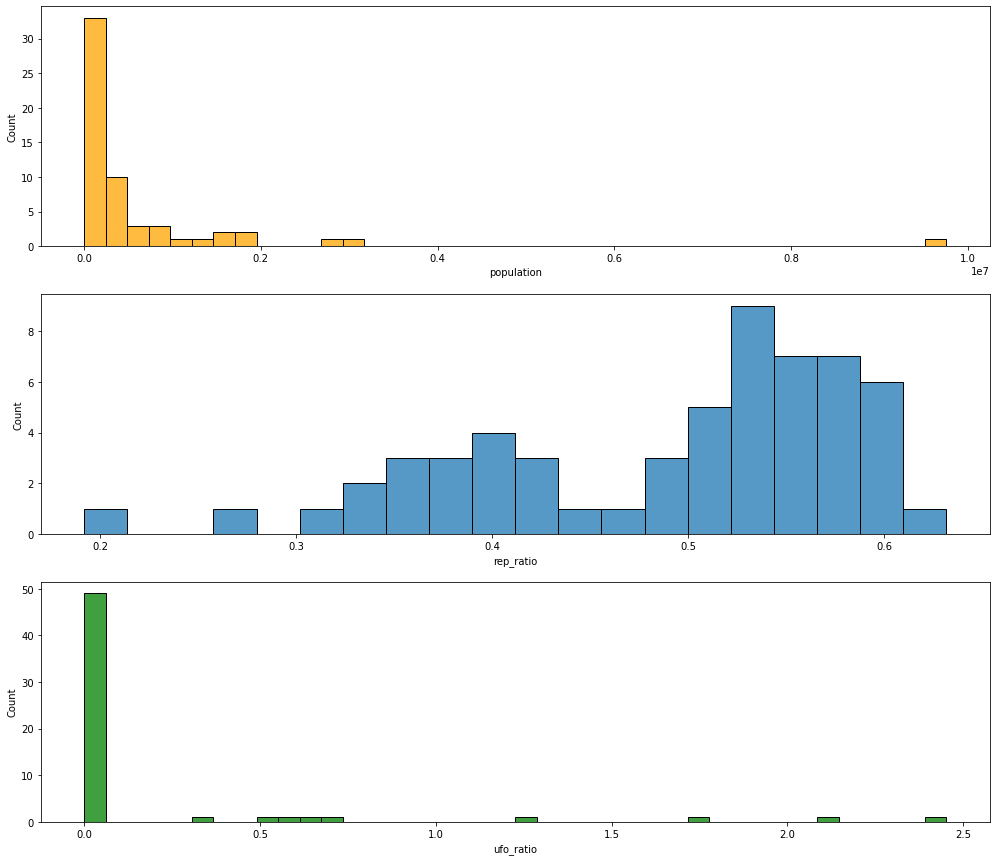

In [79]:
# Plot for 2003
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_figheight(15)

sns.histplot(data=masterlist[masterlist["year"] == 2003], x="population", ax=ax1, color="orange", bins=40)
sns.histplot(data=masterlist[masterlist["year"] == 2003], x="rep_ratio", ax=ax2, bins=20)
sns.histplot(data=masterlist[masterlist["year"] == 2003], x="ufo_ratio", ax=ax3, color="green", bins=40);

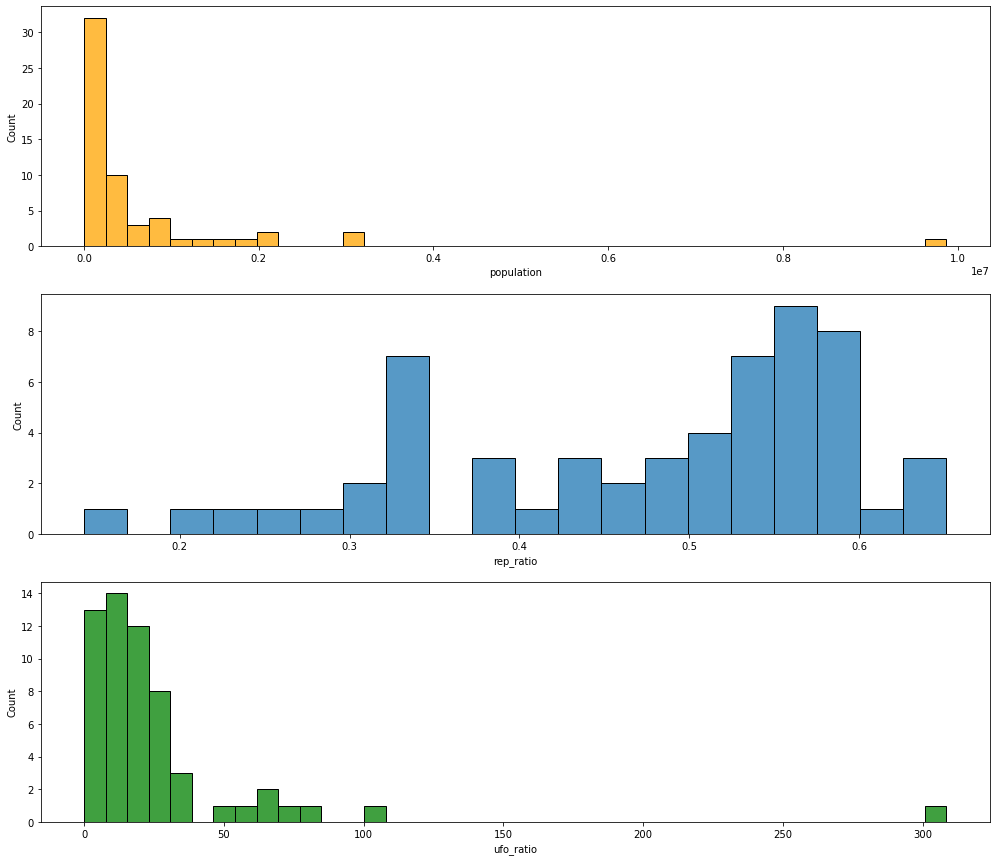

In [80]:
# Plot for 2011
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_figheight(15)

sns.histplot(data=masterlist[masterlist["year"] == 2011], x="population", ax=ax1, color="orange", bins=40)
sns.histplot(data=masterlist[masterlist["year"] == 2011], x="rep_ratio", ax=ax2, bins=20)
sns.histplot(data=masterlist[masterlist["year"] == 2011], x="ufo_ratio", ax=ax3, color="green", bins=40);

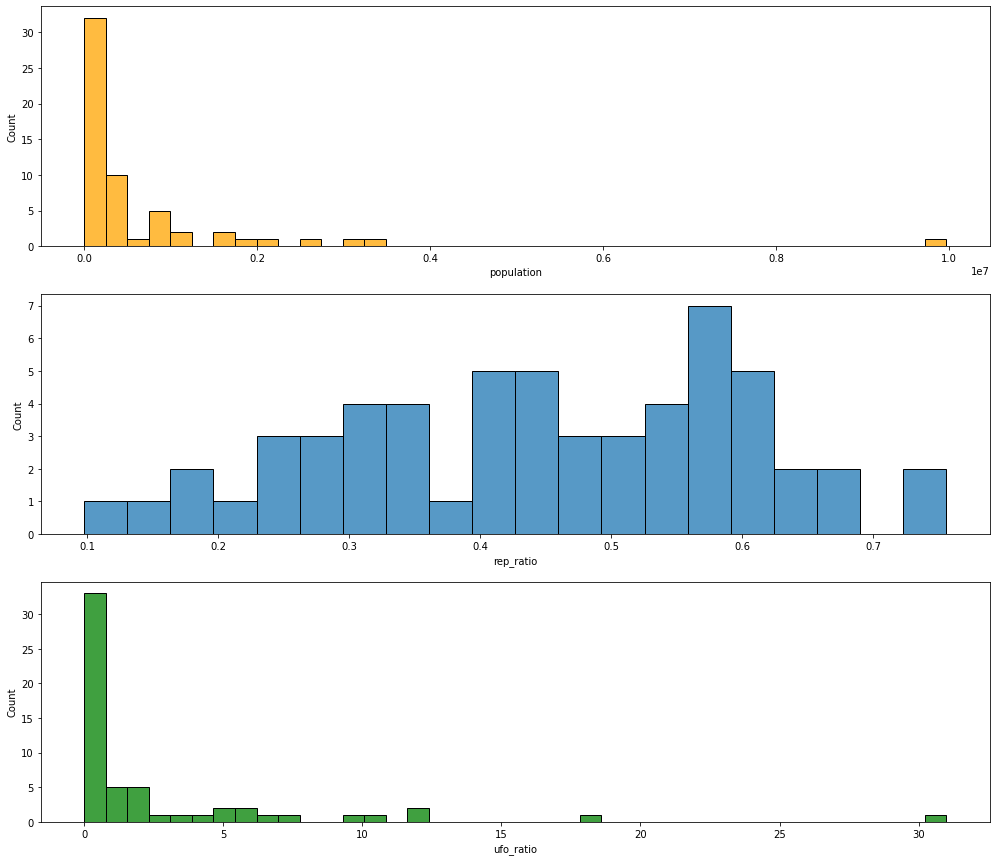

In [81]:
# Plot for 2021
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
fig.set_figheight(15)

sns.histplot(data=masterlist[masterlist["year"] == 2021], x="population", ax=ax1, color="orange", bins=40)
sns.histplot(data=masterlist[masterlist["year"] == 2021], x="rep_ratio", ax=ax2, bins=20)
sns.histplot(data=masterlist[masterlist["year"] == 2021], x="ufo_ratio", ax=ax3, color="green", bins=40);

As seen in the three sample years (2003, 2011, 2021), we see that population and ufo_ratio are skewed to the right, and rep_ratio is slighty skewed to the left as well as slightly bimodal.

Next, we wanted to take a look at the overall, general trend of population, number of republicans and UFO sightings from 2003-2021 to see how they fluctuated over the time period we were looking at in terms of state-wide changes throughout California. 

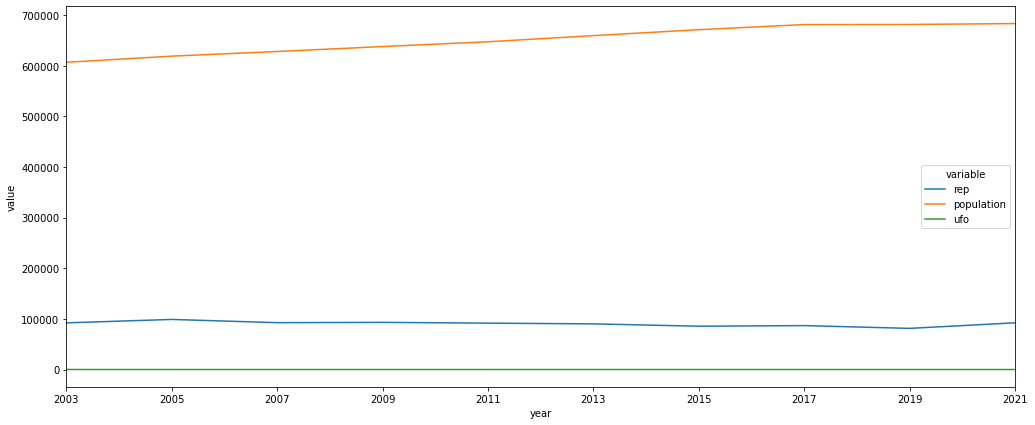

In [83]:
lineplot = masterlist
lineplot = lineplot.drop(['county','dem','rep_ratio','ufo_ratio'], axis=1)
CA = sns.lineplot(x='year',y='value',hue='variable', ci=None,data = pd.melt(lineplot,['year']))
CA.set_xlim(2003,2021)
CA.xaxis.set_major_locator(ticker.LinearLocator(10))
CA.xaxis.set_major_formatter(ticker.ScalarFormatter())

It is somewhat difficult to determine changes with each variable combined on a single lineplot given the wide variation in values. Because of this, we decided to take a look at each variable in its own individual plot.

Text(0.5, 1.0, 'Population 2003-2021')

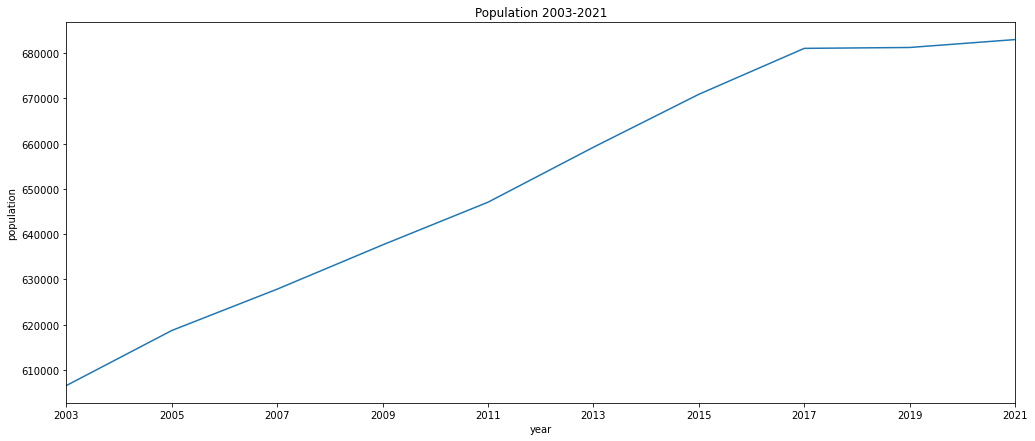

In [84]:
pop = sns.lineplot(x='year',y='population', ci=None,data = lineplot)
pop.set_xlim(2003,2021)
pop.xaxis.set_major_locator(ticker.LinearLocator(10))
pop.xaxis.set_major_formatter(ticker.ScalarFormatter())
pop.set_title('Population 2003-2021')

Text(0.5, 1.0, 'UFO Sightings 2003-2021')

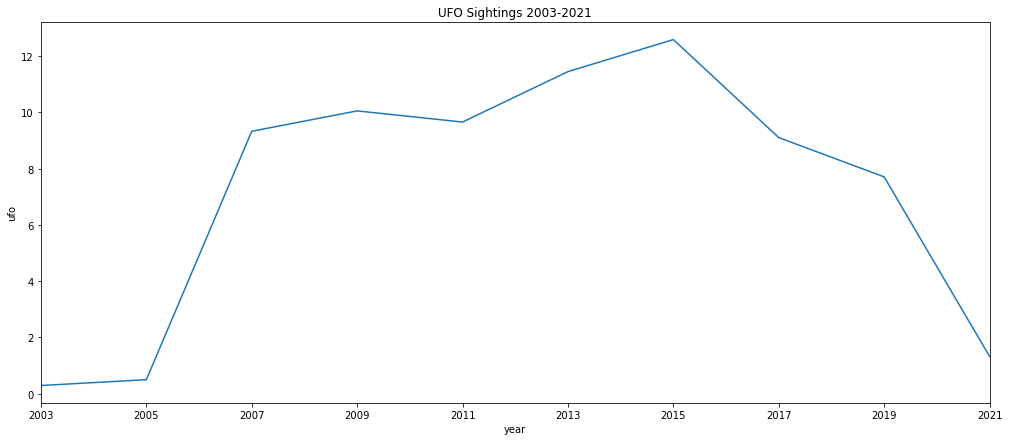

In [85]:
ufo = sns.lineplot(x='year',y='ufo', ci=None,data = lineplot)
ufo.set_xlim(2003,2021)
ufo.xaxis.set_major_locator(ticker.LinearLocator(10))
ufo.xaxis.set_major_formatter(ticker.ScalarFormatter())
ufo.set_title('UFO Sightings 2003-2021')

Text(0.5, 1.0, 'Republican Count 2003-2021')

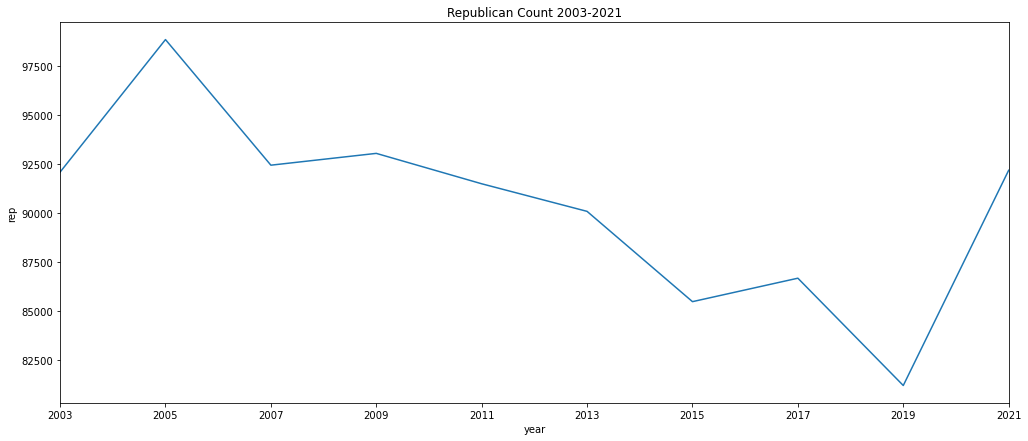

In [86]:
rep = sns.lineplot(x='year',y='rep', ci=None,data = lineplot)
rep.set_xlim(2003,2021)
rep.xaxis.set_major_locator(ticker.LinearLocator(10))
rep.xaxis.set_major_formatter(ticker.ScalarFormatter())
rep.set_title('Republican Count 2003-2021')

Within the relationship between population over time, we can see that population numbers are experiencing steady, constant growth, plateauing around 2017, but overall increasing. 

The number of UFO sightings across the years do not seem to follow any particular trend as the number of sightings increase to peak in 2015 before falling again from 2015-present. 

In the graph about Republican or party ratios, we can see that there is an overall gradual decrease in the number of Republican and an increase in the number of Democrats across California. The change is about 4% from around a 49% Republican ratio to a 45% ratio showing the shift in party affiliation. 

Since we are looking to compare party affiliation numbers by county, we wanted to take a closer look at the Republican ratio in each county. Overall, is seems as though party ratios stayed relatively constant across California couties but with a gradual shift towards either extreme. We see that at either extreme of the ratios, the largest percentage of Republicans and the largest percentage of Democrats, grows increasingly polarized. Despite most counties staying constant, we can see that there are a few counties that experienced drastic peaks and valleys in the party affiliation ratios. 

Text(0.5, 1.0, 'Republican Ratio by County 2003-2021')

<Figure size 2304x2304 with 0 Axes>

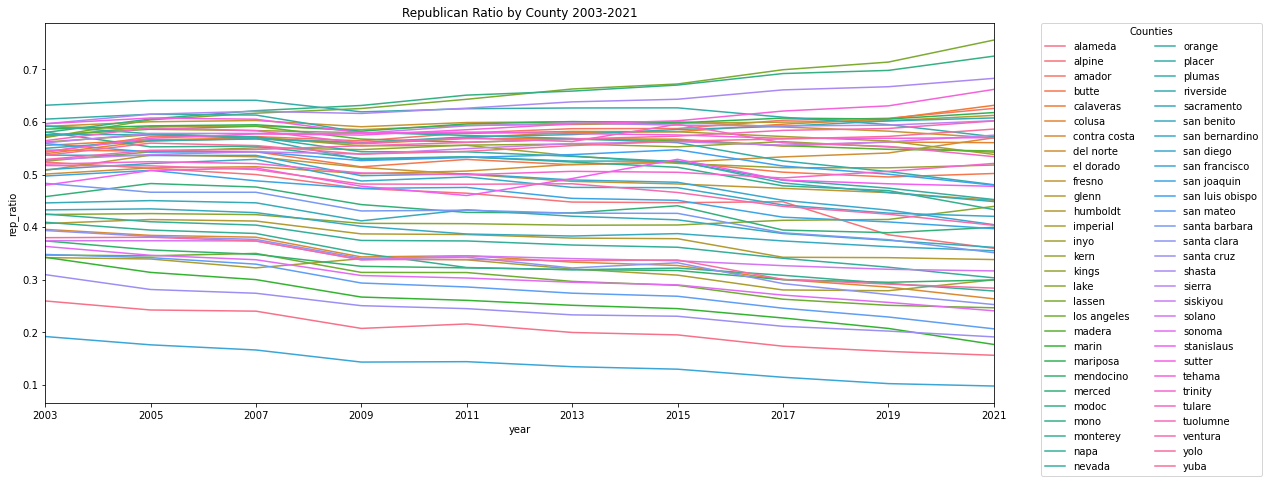

In [87]:
plt.figure(figsize=(32,32))
fig, (ax1) = plt.subplots(ncols=1,sharey=False)
rep_line = sns.lineplot(x='year', y='rep_ratio', hue='county',ax=ax1,data=masterlist,ci=None)
rep_line.set_xlim(2003,2021)
rep_line.xaxis.set_major_locator(ticker.LinearLocator(10))
rep_line.xaxis.set_major_formatter(ticker.ScalarFormatter())
rep_line.legend(title="Counties",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=2)
rep_line.set_title('Republican Ratio by County 2003-2021')

Since it is difficult to see the trends in Republican ratio in each county, we split the counties into 4 groups and further observe the trends.

In [88]:
#splitting list of counties into 4
masterlist1 = masterlist.loc[masterlist['county'] < 'kern']
masterlist2 = masterlist.loc[masterlist['county'] < 'orange']
masterlist3 = masterlist.loc[masterlist['county'] < 'santa cruz']
list1q = masterlist1
list2q = masterlist2[~masterlist2[['county']].apply(lambda x: np.in1d(x,masterlist1).all(),axis=1)].reset_index(drop=True)
list3q = masterlist3[~masterlist3[['county']].apply(lambda x: np.in1d(x,masterlist2).all(),axis=1)].reset_index(drop=True)
list3q = list3q[~list3q[['county']].apply(lambda x: np.in1d(x,masterlist1).all(),axis=1)].reset_index(drop=True)
list4q = masterlist.loc[masterlist['county'] >= 'santa cruz']

Text(0.5, 1.0, 'Alameda - Inyo')

<Figure size 2304x2304 with 0 Axes>

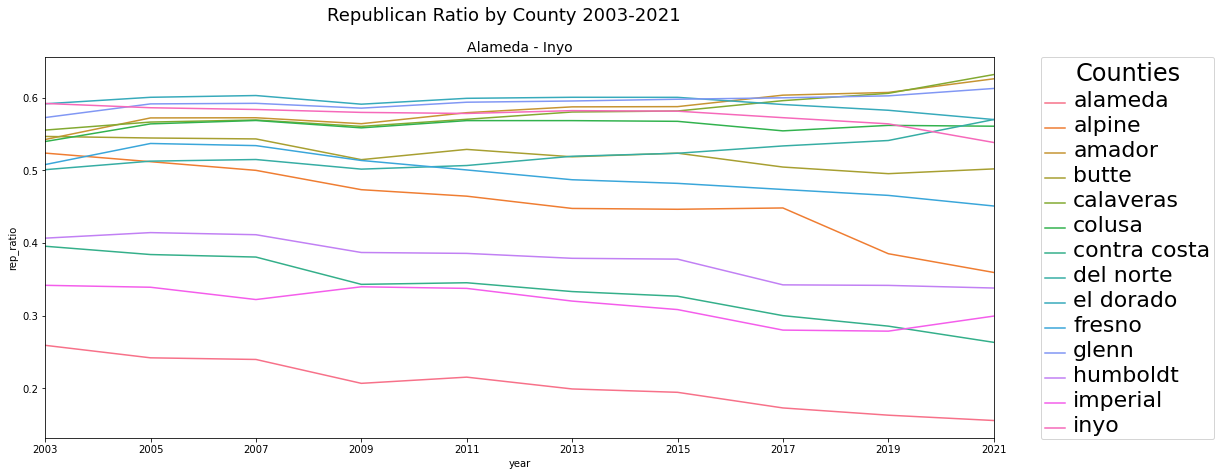

In [89]:
# first quarter of counties
plt.figure(figsize=(32,32))
fig, (ax1) = plt.subplots(ncols=1,sharey=False)
graph1q = sns.lineplot(x='year', y='rep_ratio', hue='county',ax=ax1,data=list1q,ci=None)
graph1q.set_xlim(2003,2021)
graph1q.xaxis.set_major_locator(ticker.LinearLocator(10))
graph1q.xaxis.set_major_formatter(ticker.ScalarFormatter())
graph1q.legend(title="Counties",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='24') # for legend title
plt.suptitle('Republican Ratio by County 2003-2021',fontsize=18)
plt.title('Alameda - Inyo', fontsize=14)

Text(0.5, 1.0, 'Kern - Nevada')

<Figure size 2304x2304 with 0 Axes>

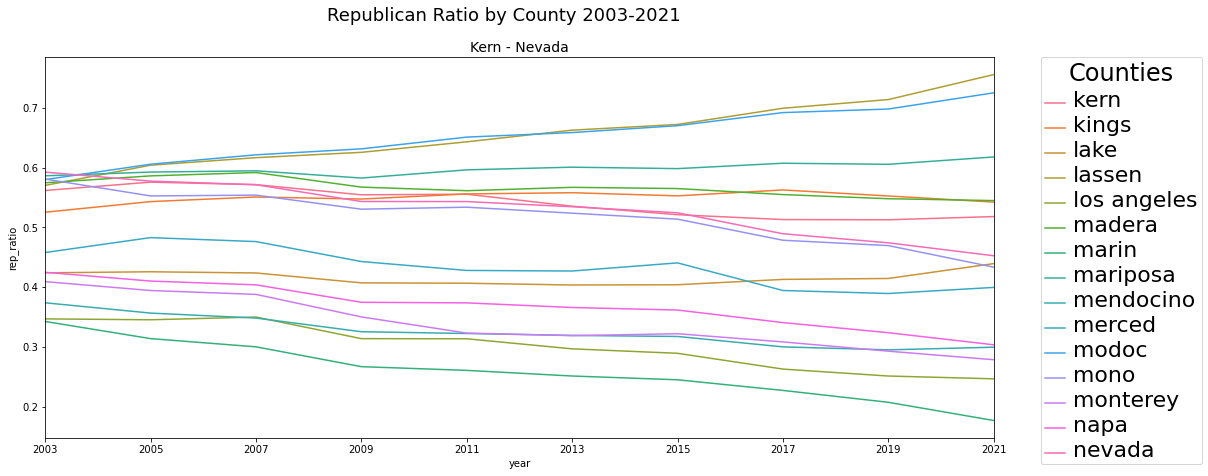

In [90]:
#second quarter of counties
plt.figure(figsize=(32,32))
fig, (ax1) = plt.subplots(ncols=1,sharey=False)
graph2q = sns.lineplot(x='year', y='rep_ratio', hue='county',ax=ax1,data=list2q,ci=None)
graph2q.set_xlim(2003,2021)
graph2q.xaxis.set_major_locator(ticker.LinearLocator(10))
graph2q.xaxis.set_major_formatter(ticker.ScalarFormatter())
graph2q.legend(title="Counties",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='24') # for legend title
plt.suptitle('Republican Ratio by County 2003-2021',fontsize=18)
plt.title('Kern - Nevada', fontsize=14)

Text(0.5, 1.0, 'Orange - Santa Clara')

<Figure size 2304x2304 with 0 Axes>

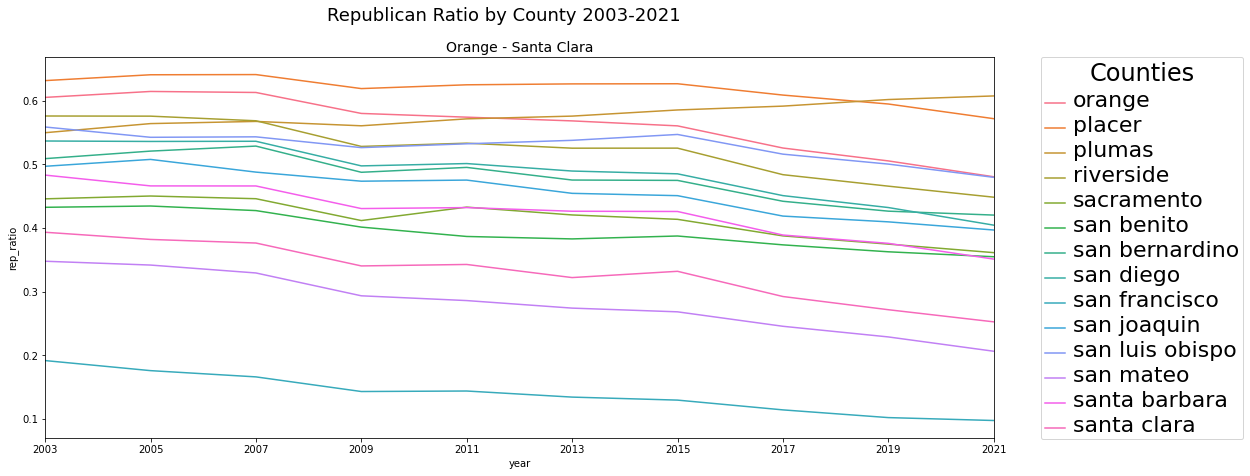

In [91]:
#thrid quarter of counties
plt.figure(figsize=(32,32))
fig, (ax1) = plt.subplots(ncols=1,sharey=False)
graph3q = sns.lineplot(x='year', y='rep_ratio', hue='county',ax=ax1,data=list3q,ci=None)
graph3q.set_xlim(2003,2021)
graph3q.xaxis.set_major_locator(ticker.LinearLocator(10))
graph3q.xaxis.set_major_formatter(ticker.ScalarFormatter())
graph3q.legend(title="Counties",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='24') # for legend title
plt.suptitle('Republican Ratio by County 2003-2021',fontsize=18)
plt.title('Orange - Santa Clara', fontsize=14)

Text(0.5, 1.0, 'Santa Cruz - Yuba')

<Figure size 2304x2304 with 0 Axes>

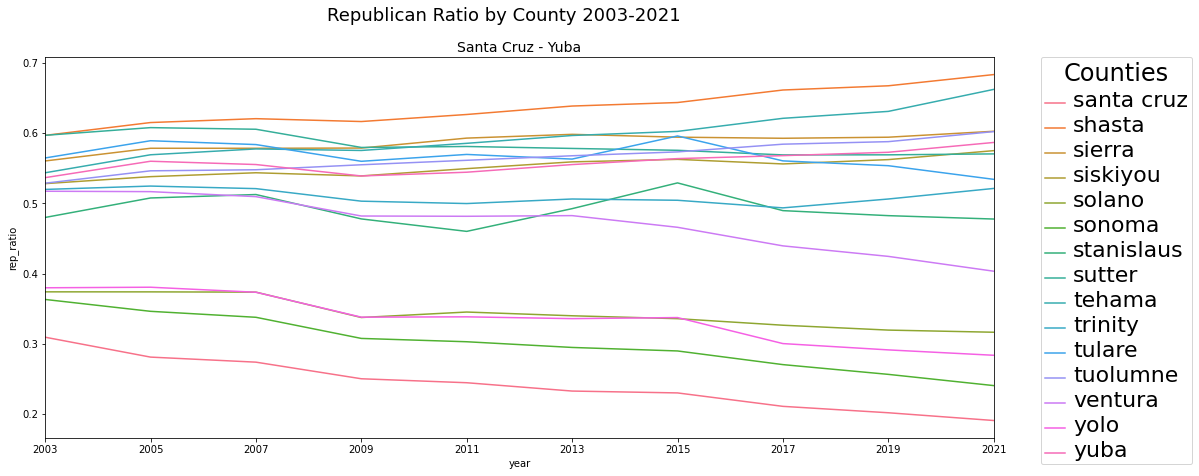

In [92]:
#fourth quarter of counties
plt.figure(figsize=(32,32))
fig, (ax1) = plt.subplots(ncols=1,sharey=False)
graph4q = sns.lineplot(x='year', y='rep_ratio', hue='county',ax=ax1,data=list4q,ci=None)
graph4q.set_xlim(2003,2021)
graph4q.xaxis.set_major_locator(ticker.LinearLocator(10))
graph4q.xaxis.set_major_formatter(ticker.ScalarFormatter())
graph4q.legend(title="Counties",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='24') # for legend title
plt.suptitle('Republican Ratio by County 2003-2021',fontsize=18)
plt.title('Santa Cruz - Yuba', fontsize=14)

From these four graphs, we see that over the selected time period, the Republican ratios of each county do not change drastically. This is to be expected as large amounts of people would not be changing their party affiliation at the same time.

To look further at the relationship across counties, we created a scatterplot plotting the counties across the years by Republican ratio and UFO sighting ratio. 

Text(0.5, 1.0, 'Frequency of UFO Sightings Based on Party Affiliation')

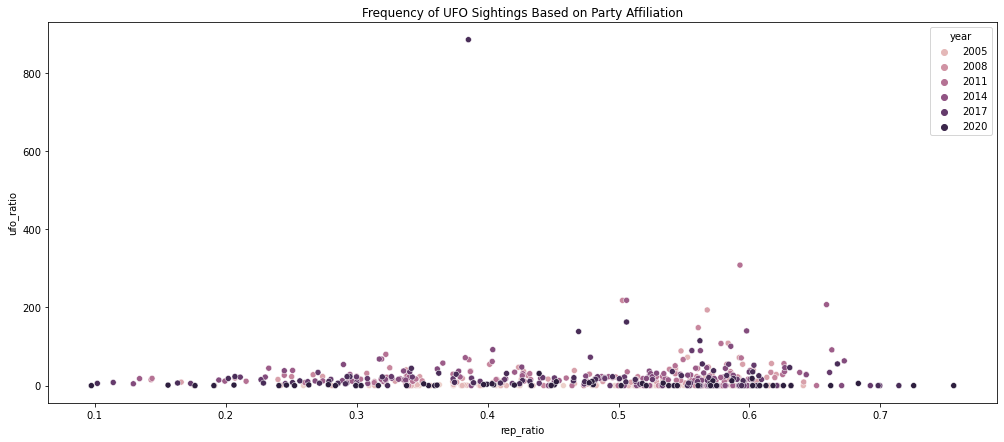

In [93]:
sns.scatterplot(data=masterlist, x="rep_ratio", y="ufo_ratio",hue='year')
plt.title('Frequency of UFO Sightings Based on Party Affiliation')

Within the counties, we see that there is a potential outlier in Alpine county. Singling this entry out, we see that this county entry had a small population and only one UFO sighting. Because of the scaling process, the number for the UFO ratio became very large. Because it is only one sighting, this large number does not indicate a large number of UFO sightings, just a large ratio of sightings compared to the population of the county.

In [94]:
masterlist[masterlist['ufo_ratio'] >  885]

,year,county,dem,rep,population,ufo,rep_ratio,ufo_ratio
465,2019,alpine,319.0,200.0,1129,1.0,0.385356,885.739593


We recreated the scatterplot, now without the outlier UFO ratio.

(0.0, 330.0)

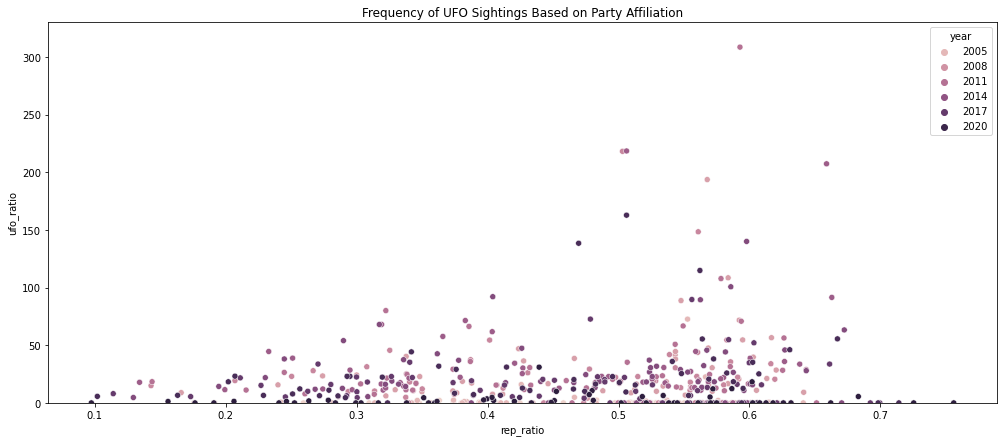

In [95]:
sns.scatterplot(data=masterlist, x="rep_ratio", y="ufo_ratio",hue='year')
plt.title('Frequency of UFO Sightings Based on Party Affiliation')
plt.ylim(0,330)

Taking a closer look across the values, we see that there is a higher frequency of sightings in the more Republican areas, skewing the distribution to the right. 

To create a better visual representation of the temporal changes across the California counties of both political party affiliations and number of UFO sightings, we made two side-by-side heatmaps comparing county and year to party affiliation and UFO sighting. 

Text(0.5, 1.0, 'UFO Sighting Frequency')

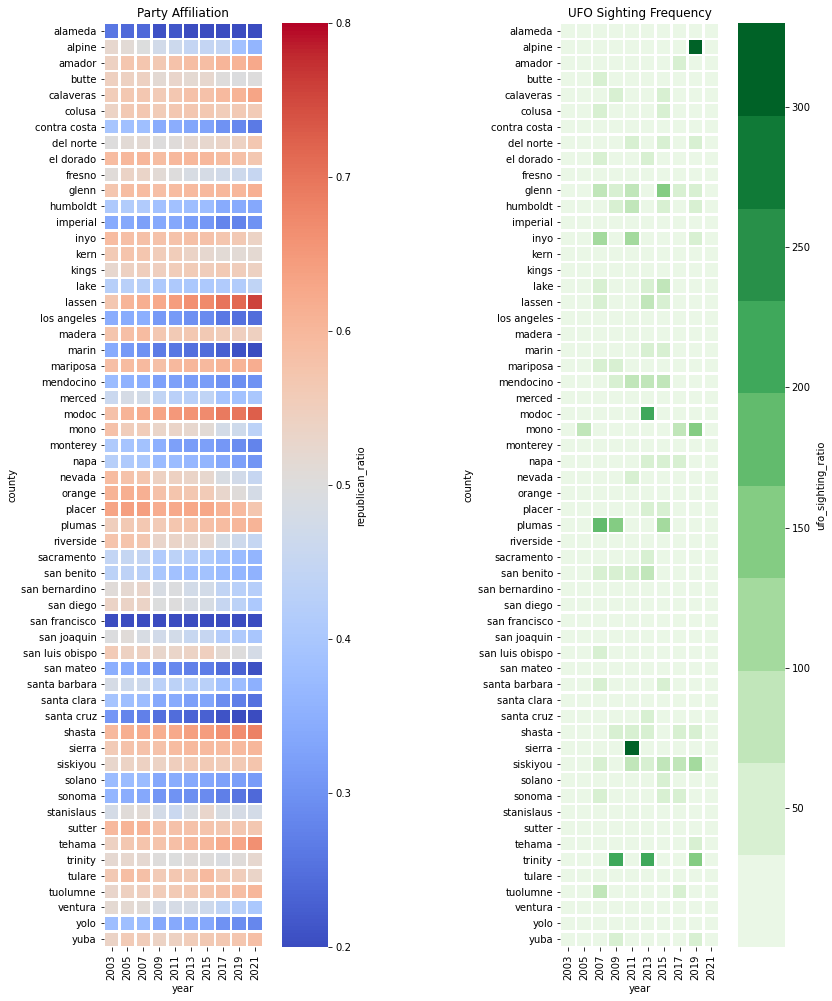

In [98]:
#heatmap
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,17))
palette_1 = sns.color_palette('coolwarm', as_cmap = True)
palette_2 = sns.color_palette('Greens', 10)
party_data = masterlist.pivot('county','year','rep_ratio')
party = sns.heatmap(party_data,ax=ax1,linewidths=1.5, square=True, 
                          yticklabels=True, cmap=palette_1,vmin=0.2,vmax=0.8, 
                          cbar_kws={'label': 'republican_ratio'})
ufo_data = masterlist.pivot('county','year','ufo_ratio')
ufo_heat = sns.heatmap(ufo_data,ax=ax2,linewidths=1.5, square=True, 
                          yticklabels=True, cmap=palette_2,vmin=0.2,vmax=330, 
                          cbar_kws={'label': 'ufo_sighting_ratio'})
ax1.set_title('Party Affiliation')
ax2.set_title('UFO Sighting Frequency')

From the heatmaps we can see the peaks in the number of sightings and compare them to the party affiliations of the counties associated with those peaks. Through this comparison, we see that the darker green squares line up with the red square more often than not, with the exception of Alpine county in 2019. This correlates with the idea that there is a higher frequency of UFO sightings in more Republican areas.

## Hypothesis testing

Through the exploratory data analysis performed above, we noticed that the ratio of ufo sightings to population and the ratio of republicans are related. We wish to test this hypothesis below:

$H_o$: There is no relationship between frequency of UFO sightings and proportion of republicans in the county. 

$H_a$: There is a linear relationship between frequency of UFO sightings and proportion of republicans in the county.

To test this hypothesis, we will be using linear regression. Note that the linear regression model assumes normal distribution of variables, however, as seen in the EDA section, the variables we are interested in (ufo_ratio and rep_ratio) are not normally distributed, so we need to normalize these distributions.

In [99]:
0 in masterlist['ufo_ratio']

True

The intuitive way to normalize the data would be to perform a log transform. However, we see that there are 0's in our data, which would result in -inf values. As an alternative, for each data point x in, we transform it to log(x+1)

In [100]:
masterlist['log_ufo_ratio'] = np.log10(masterlist['ufo_ratio'] + 1)

Below we see the distribution for log transformed ufo_ratio in 2011. Compared to the plot from before, this is a lot less skewed.

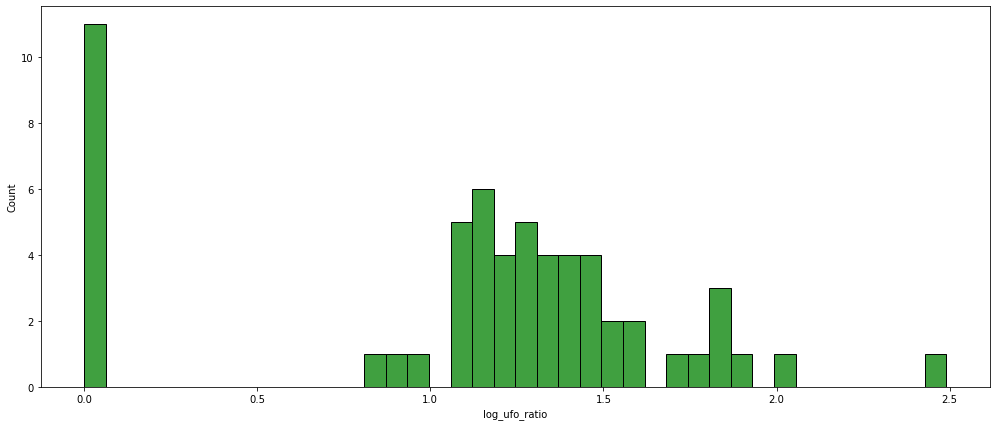

In [101]:
sns.histplot(data=masterlist[masterlist["year"] == 2011], x="log_ufo_ratio", color="green", bins=40);

We do notice that rep_ratio is a bit skewed and bimodal in some years, we didn't account for this as we weren't able to find a transformation that fitted our needs and we wanted a more continuous predictor variable. We now run linear regressions on this data by year.

In [102]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2003])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.1610
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.690
Time:                        18:54:00   Log-Likelihood:                 38.320
No. Observations:                  58   AIC:                            -72.64
Df Residuals:                      56   BIC:                            -68.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0815      0.085      0.956      0.3

log_ufo_ratio = -0.0686 * rep_ratio + 0.0815
This means that for each increase of 1 in the ratio of republicans in a county would result in a -0.0686 decrease in the log transformed ufo sightings per capita. Note that p-value = 0.690. This indicates that we were not able to reject the null hypothesis under a significance level of 0.05.

In [103]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2005])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.05536
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.815
Time:                        18:54:00   Log-Likelihood:                -23.383
No. Observations:                  58   AIC:                             50.77
Df Residuals:                      56   BIC:                             54.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2152      0.228      0.942      0.3

In [104]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2007])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.06030
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.807
Time:                        18:54:00   Log-Likelihood:                -50.004
No. Observations:                  58   AIC:                             104.0
Df Residuals:                      56   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2057      0.349      3.457      0.0

In [105]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2009])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.318
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.133
Time:                        18:54:00   Log-Likelihood:                -55.033
No. Observations:                  58   AIC:                             114.1
Df Residuals:                      56   BIC:                             118.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5422      0.346      4.455      0.0

In [106]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2011])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.159
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.286
Time:                        18:54:00   Log-Likelihood:                -52.829
No. Observations:                  58   AIC:                             109.7
Df Residuals:                      56   BIC:                             113.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4518      0.324      4.479      0.0

In [107]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2013])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.277
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0433
Time:                        18:54:00   Log-Likelihood:                -55.450
No. Observations:                  58   AIC:                             114.9
Df Residuals:                      56   BIC:                             119.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7539      0.323      5.435      0.0

In [108]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2015])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1999
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.657
Time:                        18:54:00   Log-Likelihood:                -50.718
No. Observations:                  58   AIC:                             105.4
Df Residuals:                      56   BIC:                             109.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3314      0.292      4.562      0.0

In [109]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2017])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     6.581
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0130
Time:                        18:54:00   Log-Likelihood:                -47.986
No. Observations:                  58   AIC:                             99.97
Df Residuals:                      56   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5444      0.254      6.087      0.0

In [110]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2019])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6006
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.442
Time:                        18:54:00   Log-Likelihood:                -53.698
No. Observations:                  58   AIC:                             111.4
Df Residuals:                      56   BIC:                             115.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3106      0.266      4.926      0.0

In [111]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', masterlist[masterlist["year"] == 2021])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5098
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.478
Time:                        18:54:00   Log-Likelihood:                -31.182
No. Observations:                  58   AIC:                             66.36
Df Residuals:                      56   BIC:                             70.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2029      0.169      1.197      0.2

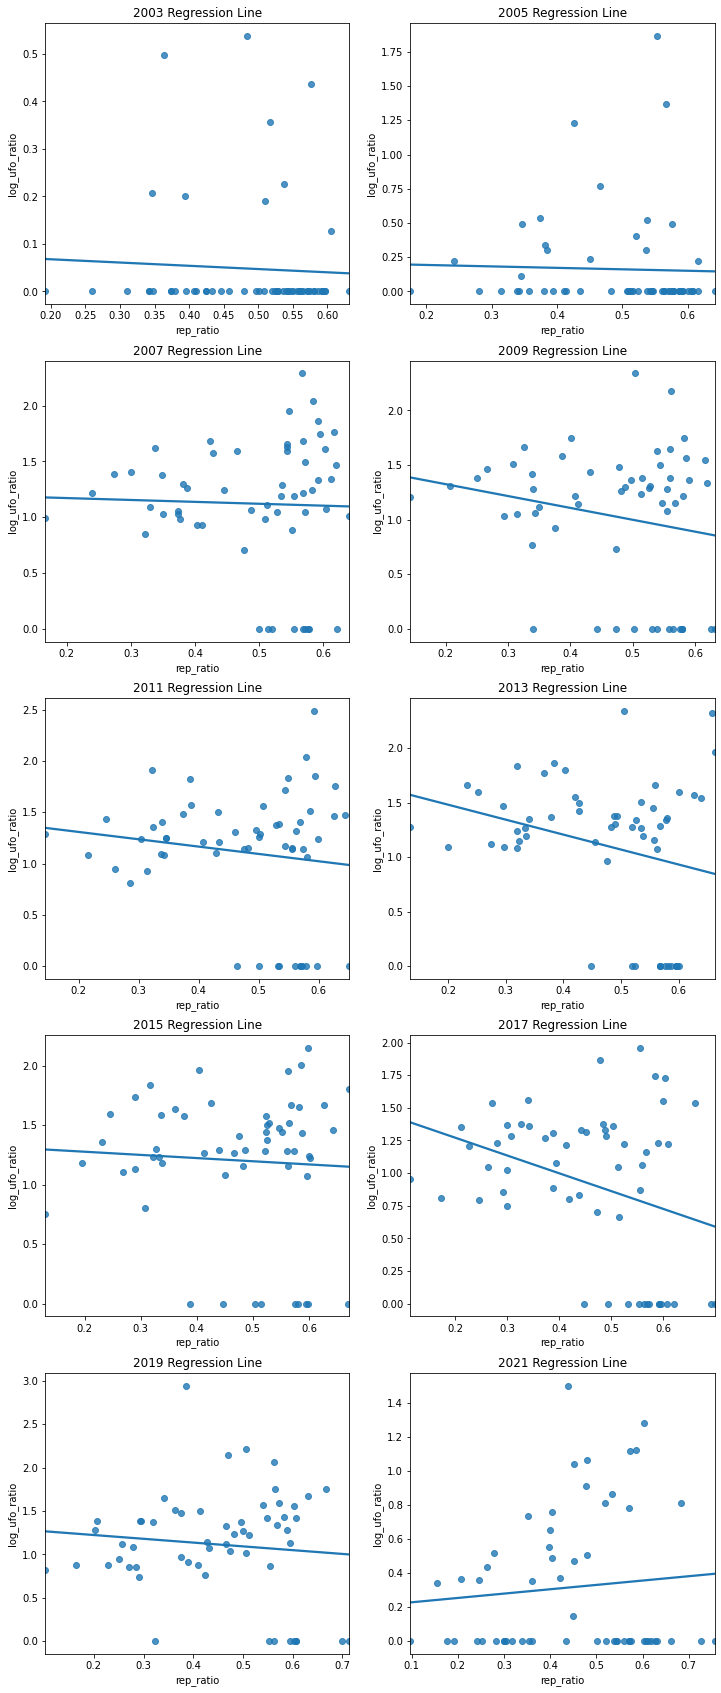

In [112]:
## plot model for data
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(12)

i = 0
j = 0
for year in range(2003, 2022, 2):
    sns.regplot(x = "rep_ratio", 
               y = "log_ufo_ratio", 
               ci = None, ax=axs[i][j], 
               data = masterlist[masterlist["year"] == year]).set_title(f'{year} Regression Line')
    j = j + 1
    i = i + j // 2
    j = j % 2

From these graphs, we can say, to an extent, there is homoscedasticity.

From the results, we see that the linear correlation is not significant under alpha = 0.05. We noticed that since there were many 0 values, the regression lines in 2021, 2003 and 2005 are making efforts to fit them. We wish to see what happens when 0 values are taken out.

As we can see in the graph from year 2003, our data violates the homoscedasticity assumption for linear regressions. Additionally, we see that the zeros in our outcome variable are pulling the regression line more than other values. Thus, we wish to run the linear regression without the zeros in our outcome variable to get a better understanding of our data. And we will account for the zeros later on using a z-test.

From running OLS, we noticed that data from years 2003 and 2005 weren’t sufficient to draw a valuable conclusion, so we will also be looking at the data from 2007. From the graph of 2007, we see that our data is more homoscedastic. Also, we observe a positive linear correlation between our predictor and outcome variables, which supports our hypothesis. 

# Here is an alternative transformation
In 2003 and 2005, we saw that the zeros were pulling the line a lot which was violating homoscedasticity.
The zeroes made the distribution not normal. So, we will remove all the zeroes for this transformation and they will be accounted for later on. 

In [113]:
masterlist[masterlist['ufo_ratio'] == 0]['year'].value_counts()

2003    49
2005    42
2021    32
2009    14
2017    14
2013    13
2011    11
2007     9
2015     9
2019     9
Name: year, dtype: int64

Here we noticed that there were more entries in earlier years. We think that this might be because fewer people had access to the internet to notice this dataset and thus less people reported ufo sightings.

In [114]:
new_masterlist = masterlist[masterlist['ufo_ratio'] != 0].copy()

new_masterlist.shape

(378, 9)

In [115]:
new_masterlist['log_ufo_ratio'] = pd.Series(np.log10(new_masterlist['ufo_ratio']))

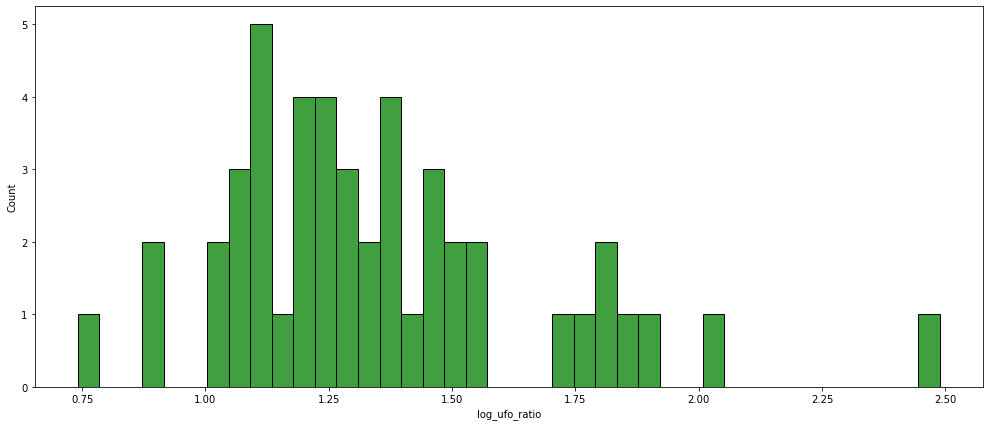

In [116]:
sns.histplot(data=new_masterlist[new_masterlist["year"] == 2011], x="log_ufo_ratio", color="green", bins=40);

$H_o$: There is no relationship between frequency of UFO sightings and proportion of republicans in the county. 

$H_a$: There is a positive linear relationship between frequency of UFO sightings and proportion of republicans in the county.

We ran the same linear regression test for each year individually to control for the temporal autocorrelation that may exist in the data. Note that we didn't address spatial autocorrelation, we will explore this towards the end.

In [117]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2003])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.2045
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.665
Time:                        18:54:01   Log-Likelihood:                -1.3596
No. Observations:                   9   AIC:                             6.719
Df Residuals:                       7   BIC:                             7.114
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2336      0.593      0.394      0.7

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [118]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2005])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.157
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.164
Time:                        18:54:01   Log-Likelihood:                -13.697
No. Observations:                  16   AIC:                             31.39
Df Residuals:                      14   BIC:                             32.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6402      0.699     -0.916      0.3

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


For the years 2003 and 2005, from the warning that we see, we do not have enough data to draw a valuable conclusion. So, lets take a look at the results from 2007.

In [119]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2007])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     6.131
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0169
Time:                        18:54:01   Log-Likelihood:                -16.047
No. Observations:                  49   AIC:                             36.09
Df Residuals:                      47   BIC:                             39.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7969      0.209      3.809      0.0

log_ufo_ratio = 1.0501 * rep_ratio + 0.7969  
This means that for each increase of 1 in the ratio of republicans in a county would result in a 1.0501 increase in the log transformed ufo sightings per capita. Note that the p-value = 0.017. This indicates that we were able to reject the null hypothesis under a significance level of 0.05 and move onto the alternative hypothesis that there is a linear correlation between the ratio of republicans in a county and the log transformed ufo sightings per capita.

In [120]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2009])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.756
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.104
Time:                        18:54:01   Log-Likelihood:                -10.310
No. Observations:                  44   AIC:                             24.62
Df Residuals:                      42   BIC:                             28.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0410      0.183      5.696      0.0

In [121]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2011])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     6.777
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0125
Time:                        18:54:01   Log-Likelihood:                -10.533
No. Observations:                  47   AIC:                             25.07
Df Residuals:                      45   BIC:                             28.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9241      0.170      5.432      0.0

In [122]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2013])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.968
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0921
Time:                        18:54:01   Log-Likelihood:                -9.9257
No. Observations:                  45   AIC:                             23.85
Df Residuals:                      43   BIC:                             27.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1410      0.163      7.005      0.0

In [123]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2015])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.436
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0146
Time:                        18:54:01   Log-Likelihood:                -7.8614
No. Observations:                  49   AIC:                             19.72
Df Residuals:                      47   BIC:                             23.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0436      0.149      7.012      0.0

In [124]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2017])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.634
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0371
Time:                        18:54:01   Log-Likelihood:                -11.555
No. Observations:                  44   AIC:                             27.11
Df Residuals:                      42   BIC:                             30.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8523      0.160      5.341      0.0

In [125]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2019])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.080
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00660
Time:                        18:54:01   Log-Likelihood:                -25.286
No. Observations:                  49   AIC:                             54.57
Df Residuals:                      47   BIC:                             58.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7688      0.192      4.001      0.0

In [126]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rep_ratio', new_masterlist[new_masterlist["year"] == 2021])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     13.26
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00129
Time:                        18:54:01   Log-Likelihood:                -9.3961
No. Observations:                  26   AIC:                             22.79
Df Residuals:                      24   BIC:                             25.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3166      0.253     -1.250      0.2

Excluding years 2003 and 2005 due to a relatively smaller dataset, we were able to reject our null hypothesis in all years except 2009 and 2013. Now let's look at what the regression lines look like.

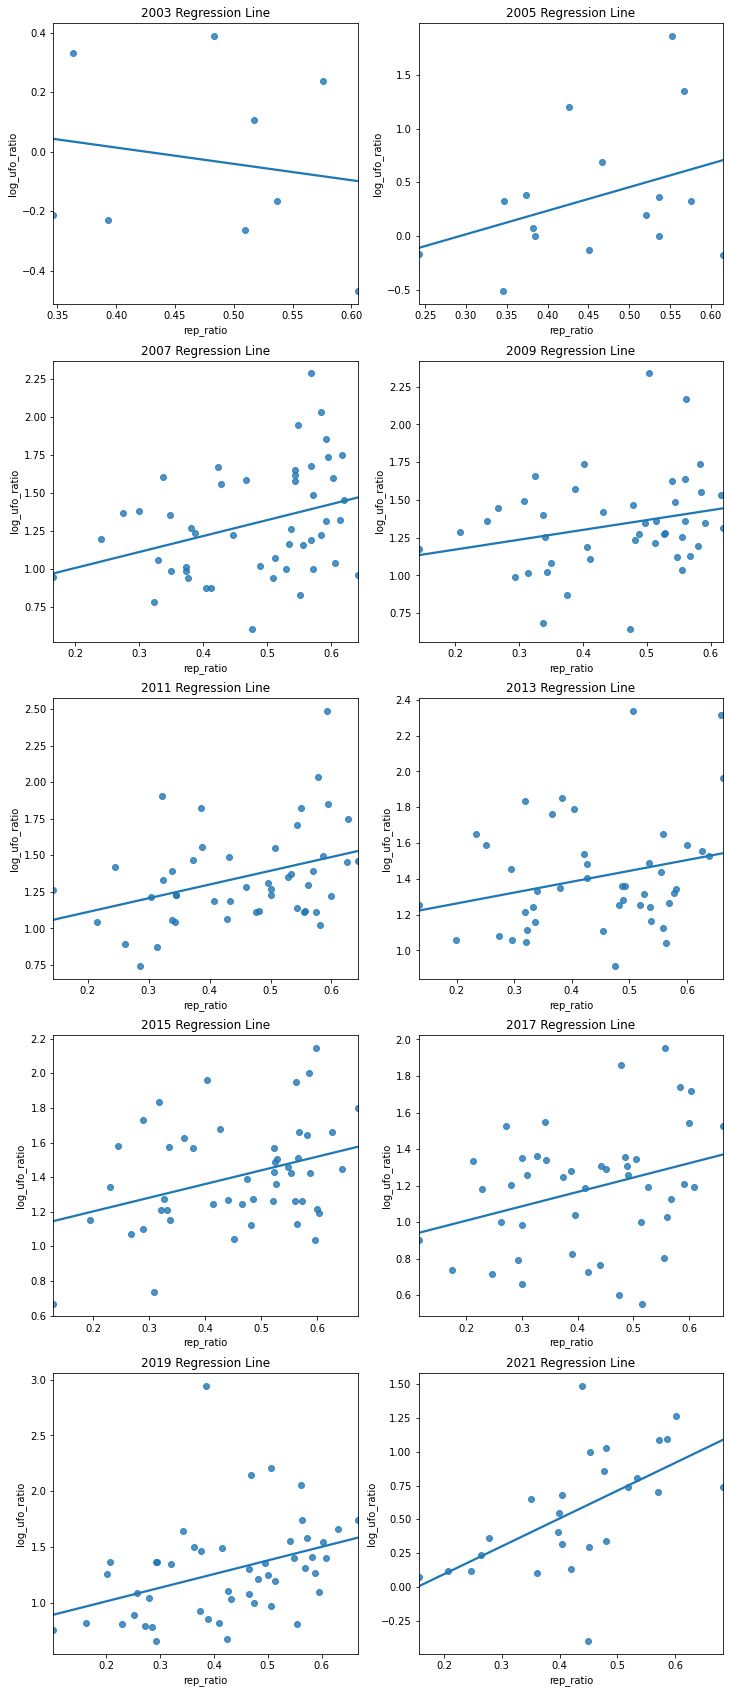

In [127]:
## plot model for data
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(12)

i = 0
j = 0
for year in range(2003, 2022, 2):
    sns.regplot(x = "rep_ratio", 
               y = "log_ufo_ratio", 
               ci = None, ax=axs[i][j], 
               data = new_masterlist[new_masterlist["year"] == year]).set_title(f'{year} Regression Line')
    j = j + 1
    i = i + j // 2
    j = j % 2

From these graphs, we can say, to an extent, there is homoscedasticity. It looks like there is a positive linear correlation between the log transformed predictors and our outcome.

Now, we wish to take another look at the 0 entries that we dropped before this analysis. To do this, we conduct a  z-test for proportions to see if the proportion of republican counties with 0 entries is the same for democratic counties

$H_o$: proportion of republican counties with 0s is 0.5 (same as democratic counties)

$H_a$: proportion of republican counties with 0s is not 0.5 (different democratic counties)

First, we need to seperate our data to two groups, dem_df and rep_df

In [128]:
zero_df = masterlist[ masterlist['ufo_ratio']== 0 ]

In [129]:
pvals = []

for year in range(2003, 2022, 2):
    year_df = zero_df[zero_df['year'] == year]
    
    rep_zeros = (year_df['rep_ratio'] >= 0.5).sum()

    print("rep " + str(year) + " : " + str(rep_zeros / year_df.shape[0]))

    stat, pval = proportions_ztest(rep_zeros, year_df.shape[0], 0.5)
    pvals.append(pval)

rep 2003 : 0.6122448979591837
rep 2005 : 0.7142857142857143
rep 2007 : 1.0
rep 2009 : 0.7857142857142857
rep 2011 : 0.8181818181818182
rep 2013 : 0.9230769230769231
rep 2015 : 0.7777777777777778
rep 2017 : 0.8571428571428571
rep 2019 : 0.8888888888888888
rep 2021 : 0.5625


/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


In [130]:
pvals

[0.10683414577902073,
 0.0021114910066706016,
 0.0,
 0.009177890025421331,
 0.006217669063580888,
 1.0368902328016621e-08,
 0.04502088100253858,
 0.00013409532032314335,
 0.00020537573614121796,
 0.4760334929424296]

Other than data from 2003 and 2021, we see that there is significantly difference (alpha = 0.05) between the proportion of republican counties whose entries are dropped and 0.5, indicating a difference in proportions between democratic counties and republican counties.

However, the actual proportions are opposite of what we would expect: we hypothesized that republican counties were more likely to have ufo sightings, this would imply that a smaller proportion of republican counties will have 0 ufo sightings (whereas most observed proportions were > 0.5). Even though we were able to see a positive correlation between rep_ratio and log_ufo_ratio, the effect is reverse in this test. 

## Possible Confounding variable
According to [https://www.nytimes.com/2021/04/09/nyregion/ufo-sightings-recent.html], rural areas, due to less light pollution and clearer skies, are more likely to have ufo sightings. Moreover, according to [https://www.pewresearch.org/politics/2018/03/20/1-trends-in-party-affiliation-among-demographic-groups/], rural areas are also more likely to have a higher proportion of republicans, thus, being a rural area may be a confounding variable in our analysis.  

According to USDA ERS, rural areas consist of open countryside with population densities less than 500 people per square mile and places with fewer than 2,500 people. (https://www.ers.usda.gov/topics/rural-economy-population/rural-classifications/what-is-rural.aspx)

First,we need to generate a column with the population density of each county to be able to classify them either as urban or rural areas. We get the area of the counties from one of our population datasets.

In [131]:
pop_2019 = pd.read_csv("data/pop_2019.csv")

In [132]:
pop_2019.head()

,Unnamed: 0,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,0,Alameda,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter\n,"1,671,329\n","738 sq mi(1,911 km2)",\n\n\n
1,1,Alpine,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law\n,"1,129\n","739 sq mi(1,914 km2)",\n\n\n
2,2,Amador,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law\n,"39,752\n","606 sq mi(1,570 km2)",\n\n\n
3,3,Butte,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter\n,"219,186\n","1,640 sq mi(4,248 km2)",\n\n\n
4,4,Calaveras,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law\n,"45,905\n","1,020 sq mi(2,642 km2)",\n\n\n


In [133]:
pop_2019['Area[6]'].head()

0      738 sq mi(1,911 km2)
1      739 sq mi(1,914 km2)
2      606 sq mi(1,570 km2)
3    1,640 sq mi(4,248 km2)
4    1,020 sq mi(2,642 km2)
Name: Area[6], dtype: object

We first clean the dataset so that it only contains the county name and its area.

In [134]:
area_list = pop_2019.drop(["Unnamed: 0", "FIPS code[5]", "County seat[6]", "Est.[6]", "Formed from", "Etymology[7]",  "General Law or Charter[8]", "Map"], 1)

In [135]:
area_list.columns = ['county', 'population 2019', 'area']
area_list.drop(labels=['population 2019'], axis=1, inplace=True)
area_list.head()

,county,area
0,Alameda,"738 sq mi(1,911 km2)"
1,Alpine,"739 sq mi(1,914 km2)"
2,Amador,"606 sq mi(1,570 km2)"
3,Butte,"1,640 sq mi(4,248 km2)"
4,Calaveras,"1,020 sq mi(2,642 km2)"


In [136]:
# we want our area to use sq miles as units
def normalize_area(str_in):
    str_in = str_in.split('\xa0')
    out = str_in[0]
    out = out.replace(',', '')
    return int(out)

In [137]:
area_list['area'] = area_list['area'].apply(normalize_area)

In [138]:
area_list['county'] = area_list['county'].apply(lambda x : x.lower())

In [139]:
# We create a area dictionary for easier lookups
area_dict = {}

for i in area_list.index:
    if area_list.at[i, 'county'] == 'san':
        area_dict[ 'san francisco' ] = area_list.at[i, 'area']
    else:
        area_dict[ area_list.at[i, 'county'] ] = area_list.at[i, 'area']

Now we can compute the population density of each county

In [140]:
masterlist['pop_density'] = 0

for i in masterlist.index:
    area = area_dict[ masterlist.at[i, 'county'] ]
    masterlist.at[i, 'pop_density'] = masterlist.at[i, 'population'] / area

In [141]:
masterlist.shape

(580, 10)

Now with the population densities, we can classify rural counties.

In [142]:
masterlist['rural'] = 0

for i in masterlist.index:
    if masterlist.at[i, 'pop_density'] < 500 or masterlist.at[i, 'population'] < 2500:
        masterlist.at[i, 'rural'] = 1

In [143]:
masterlist['rural'].value_counts()

1    468
0    112
Name: rural, dtype: int64

Add the rural columns to the new_masterlist where 0 entries are dropped

In [144]:
new_masterlist['rural'] = masterlist[masterlist['ufo_ratio'] != 0]['rural']

# Colinearity analysis
We wish to also see how whether an area is considered rural contributes to our linear regression model. To do this, we need to make sure that there is no colinearity between our predictor variables rural and rep_ratio. Here we run a linear regression on these variables to test this.

$H_o$: there is no relationship between variables rural and rep_ratio

$H_a$: there is a linear relationship between variables rural and rep_ratio

In [145]:
res = []
for year in range(2003, 2022, 2):
    temp = new_masterlist[new_masterlist['year'] == year]
    
    outcome, predictors = patsy.dmatrices('rural ~ rep_ratio', temp)
    model = sm.OLS(outcome, predictors)

    ## fit the model
    results = model.fit()
    res.append(results)

In [146]:
# Get the p values
for results in res:
    print(results.pvalues[1])

0.7811681214573529
0.24995316405363305
0.0005575941309246599
0.00048355284293614053
0.0007708193551898603
0.000755915196871912
8.468529127565235e-06
8.689787059514146e-05
6.857158985612619e-05
0.0008353794099089641


We can see that based on the significance level of 0.05, we were able to reject the null hypotheis (with the exception of 2003 and 2005 where we have a limited dataset) and conclude that there is colinearity between rural and rep_ratio, thus we cannot perform linear regression with both variables as predictors. Thus, we look at how well the variable rural can predict log_ufo_raio.

$H_o$: There is no relationship between frequency of UFO sightings and whether the county is a rural area. 

$H_a$: There is a linear relationship between frequency of UFO sightings and whether the county is a rural area.

In [147]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2003])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     8.839
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0207
Time:                        18:54:03   Log-Likelihood:                 2.1854
No. Observations:                   9   AIC:                           -0.3708
Df Residuals:                       7   BIC:                           0.02364
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2686      0.108     -2.496      0.0

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


log_ufo_ratio = 0.4292 * rural - 0.2686
This indicates that there is a positive linear relationship between whether an area is rural and the log transformed ufo sightings per capita in our sample data. Given a p-value of 0.021 we are able to reject the null hypothesis under a significance level of 0.05, indicating a linear relationship between our predictor and outcome variables in the population.

In [148]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2005])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     14.11
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00213
Time:                        18:54:03   Log-Likelihood:                -9.2669
No. Observations:                  16   AIC:                             22.53
Df Residuals:                      14   BIC:                             24.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1296      0.174     -0.743      0.4

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [149]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2007])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.009
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.163
Time:                        18:54:03   Log-Likelihood:                -18.025
No. Observations:                  49   AIC:                             40.05
Df Residuals:                      47   BIC:                             43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1579      0.113     10.259      0.0

In [150]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2009])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.349
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0743
Time:                        18:54:03   Log-Likelihood:                -10.020
No. Observations:                  44   AIC:                             24.04
Df Residuals:                      42   BIC:                             27.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1759      0.098     11.957      0.0

In [151]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2011])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     7.208
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0101
Time:                        18:54:03   Log-Likelihood:                -10.338
No. Observations:                  47   AIC:                             24.68
Df Residuals:                      45   BIC:                             28.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1190      0.097     11.484      0.0

In [152]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2013])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     4.693
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0359
Time:                        18:54:03   Log-Likelihood:                -9.0966
No. Observations:                  45   AIC:                             22.19
Df Residuals:                      43   BIC:                             25.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2478      0.087     14.267      0.0

In [153]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2015])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.839
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00740
Time:                        18:54:03   Log-Likelihood:                -7.2264
No. Observations:                  49   AIC:                             18.45
Df Residuals:                      47   BIC:                             22.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2156      0.079     15.308      0.0

In [154]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2017])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.398
Date:                Tue, 08 Jun 2021   Prob (F-statistic):             0.0723
Time:                        18:54:03   Log-Likelihood:                -12.146
No. Observations:                  44   AIC:                             28.29
Df Residuals:                      42   BIC:                             31.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0394      0.091     11.482      0.0

In [155]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2019])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     12.57
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000901
Time:                        18:54:03   Log-Likelihood:                -23.368
No. Observations:                  49   AIC:                             50.74
Df Residuals:                      47   BIC:                             54.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9345      0.115      8.133      0.0

In [156]:
outcome, predictors = patsy.dmatrices('log_ufo_ratio ~ rural', new_masterlist[new_masterlist["year"] == 2021])
model = sm.OLS(outcome, predictors)

## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_ufo_ratio   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     10.14
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00399
Time:                        18:54:03   Log-Likelihood:                -10.535
No. Observations:                  26   AIC:                             25.07
Df Residuals:                      24   BIC:                             27.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2150      0.134      1.610      0.1

Similarly, we see that we were able to reject the null hypothesis in all years except 2007, 2009 and 2013. Thus, we move to the alternative hypothesis, saying that in most years, there is a linear correlation between whether the county is a rural area, and the frequency of ufo sightings.

Similarly, we wish to still account for the dropped 0 entires in our test. Thus, we run a 2 sample z test.

$H_o$: proportions of urban counties with 0 entries in ufo_ratio = 0.5

$H_a$: proportions of urban counties with 0 entries in ufo_ratio $\neq 0.5$

In [157]:
zero_df = masterlist[masterlist['ufo_ratio'] == 0]

In [158]:
pvals = []

for year in range(2003, 2022, 2):
    year_df = zero_df[zero_df['year'] == year]
    
    rural_zeros = (year_df['rural'] == 1).sum()

    print("rural " + str(year) + " : " + str(rural_zeros / year_df.shape[0]))

    stat, pval = proportions_ztest(rural_zeros, year_df.shape[0], 0.5)
    pvals.append(pval)

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


rural 2003 : 0.8775510204081632
rural 2005 : 0.9285714285714286
rural 2007 : 1.0
rural 2009 : 1.0
rural 2011 : 1.0
rural 2013 : 1.0
rural 2015 : 1.0
rural 2017 : 1.0
rural 2019 : 1.0
rural 2021 : 0.875


/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std
/opt/conda/lib/python3.8/site-packages/statsmodels/stats/weightstats.py:788: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


In [159]:
pvals

[7.486124922927381e-16,
 4.069906142871205e-27,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4149941769000576e-10]

Here we notice a similar pattern as we saw with the rep_ratio data. There is a significant difference in our proportions in most years (alpha = 0.05). But we expected that there would be more 0 entries in the urban dataset, opposed to seeing more 0 entires in the rural dataset. Although we weren't able to explore more, we think that this could be because people in rural areas are less likely to report.

Thus, whether the county is a rural area could indeed be a confounding variable to our analysis.

# Spatial Autocorrelation

As in most geospatial analysis, spatial autocorrelation is unavoidable, here we explore the autocorrelation in our variables log_ufo_ratio, rural, and rep_ratio

To do this, we are going to use choropleth maps. And for this purpose, we are going to transform our dataframe into a geopandas dataframe, which requires a geometry object for each county in CA.

In [160]:
geometry = gpd.read_file('data/CA_Counties/CA_Counties_TIGER2016.shp')

In [161]:
# Only keep the variables we need
geometry = geometry[['NAME', 'geometry']].copy()

In [162]:
# clean a bit
geometry.columns = ['county', 'geometry']
geometry['county'] = geometry['county'].apply(lambda x: x.lower())

In [163]:
# verify that shape matchs
geometry.shape

(58, 2)

In [164]:
# Here we get an idea of what our geometry dataset looks like
geometry.head()

,county,geometry
0,sierra,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,sacramento,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,santa barbara,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,calaveras,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,ventura,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [165]:
# For simpler lookups later on, we transform our dataframe into a dictionary
geometry_dict = {}
for i in range(0, geometry.shape[0]):
    geometry_dict[ geometry.loc[i, 'county'] ] = geometry.loc[i, 'geometry']

In [166]:
# We then fill the table with proper geometry objects for each county
for i in masterlist.index:
    masterlist.at[i, 'geometry'] = geometry_dict[ masterlist.loc[i, 'county'] ]

In [167]:
# End product
masterlist.head()

,year,county,dem,rep,population,ufo,rep_ratio,ufo_ratio,log_ufo_ratio,pop_density,rural,geometry
0,2003,alameda,372317.0,130393.0,1467892,0.0,0.259380,0.0,0.0,1989,0,POLYGON ((-13612246.76328248 4538150.085244546...
1,2003,alpine,281.0,309.0,1248,0.0,0.523729,0.0,0.0,1,1,POLYGON ((-13366503.50758146 4678946.015318793...
2,2003,amador,7192.0,8525.0,36656,0.0,0.542406,0.0,0.0,60,1,POLYGON ((-13472697.86293539 4647652.232214323...
3,2003,butte,39122.0,47173.0,209389,0.0,0.546648,0.0,0.0,127,1,POLYGON ((-13565004.79317821 4798394.124309788...
4,2003,calaveras,8891.0,11105.0,42651,0.0,0.555361,0.0,0.0,41,1,"POLYGON ((-13428575.483353 4627725.227535474, ..."


In [168]:
# As we have the geometry objects, we can turn our dataframe into a geodataframe from geopandas
geolist = gpd.GeoDataFrame(masterlist)

## Choropleth for log_ufo_ratio

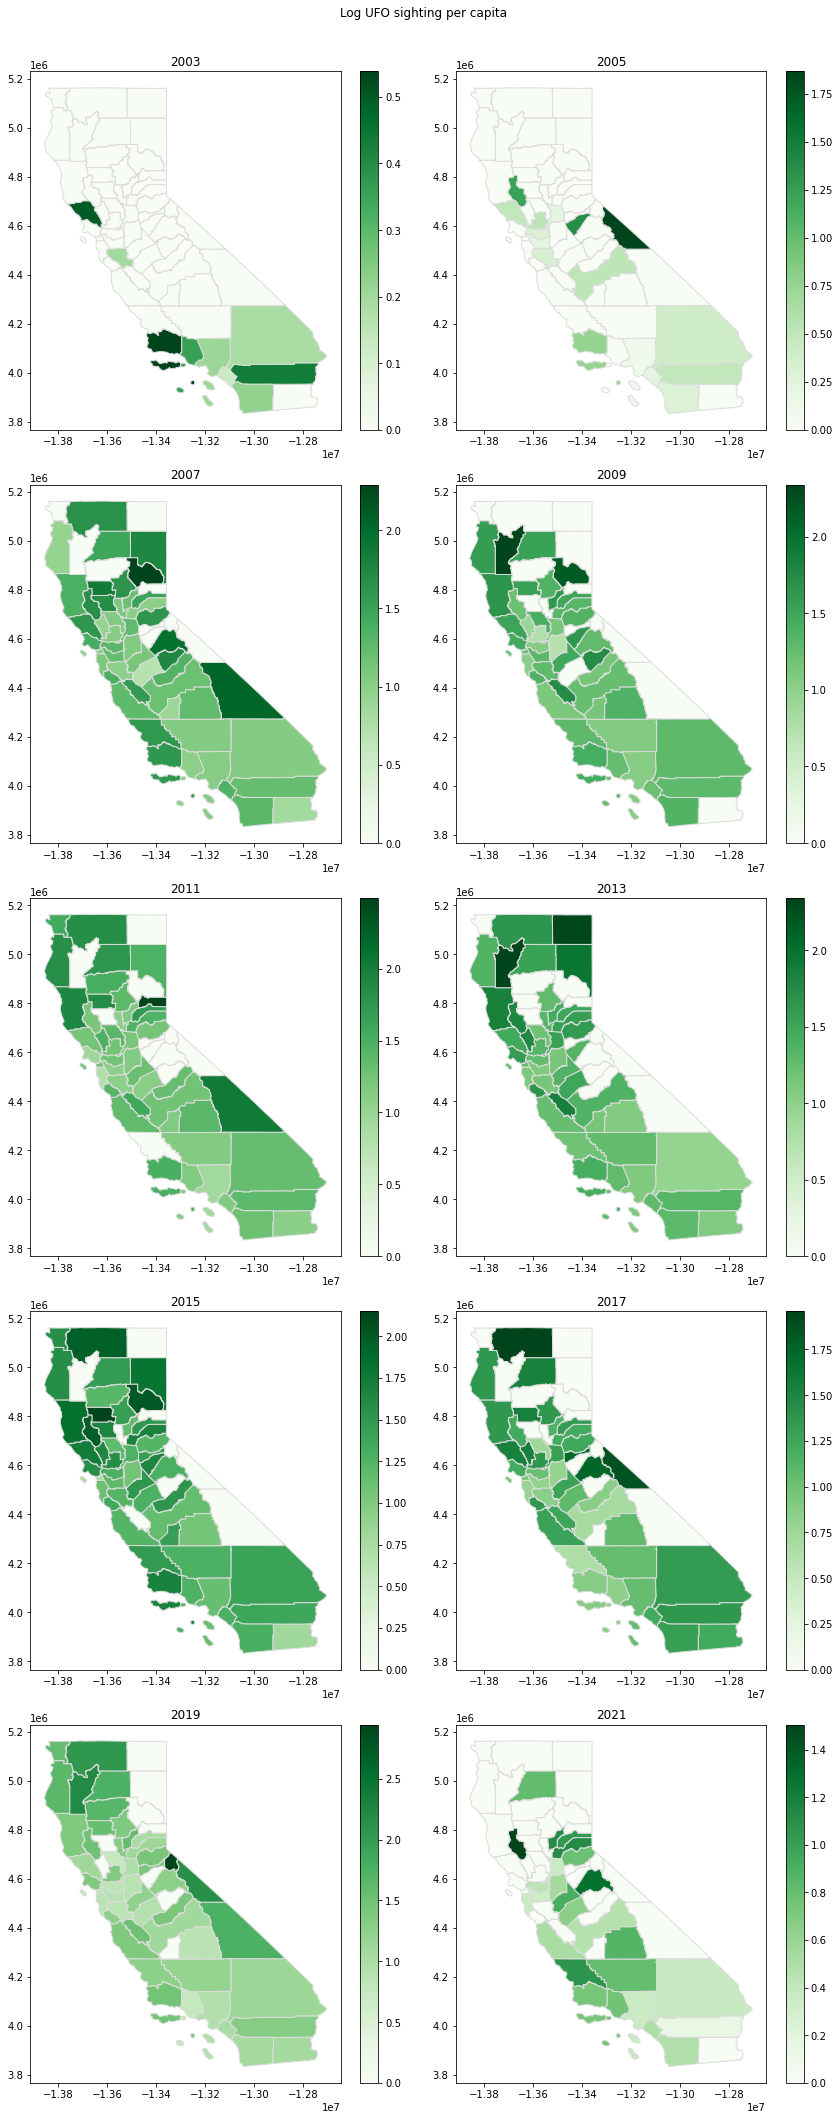

In [169]:
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(12)

i = 0
j = 0
for year in range(2003, 2022, 2):
    geolist[geolist['year'] == year].plot(column='log_ufo_ratio', cmap='Greens',edgecolor='gainsboro', legend=True, ax=axs[i][j]).set_title(str(year));
    j = j + 1
    i = i + j // 2
    j = j % 2
 
fig.suptitle('Log UFO sighting per capita')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

## Choropleth for rural

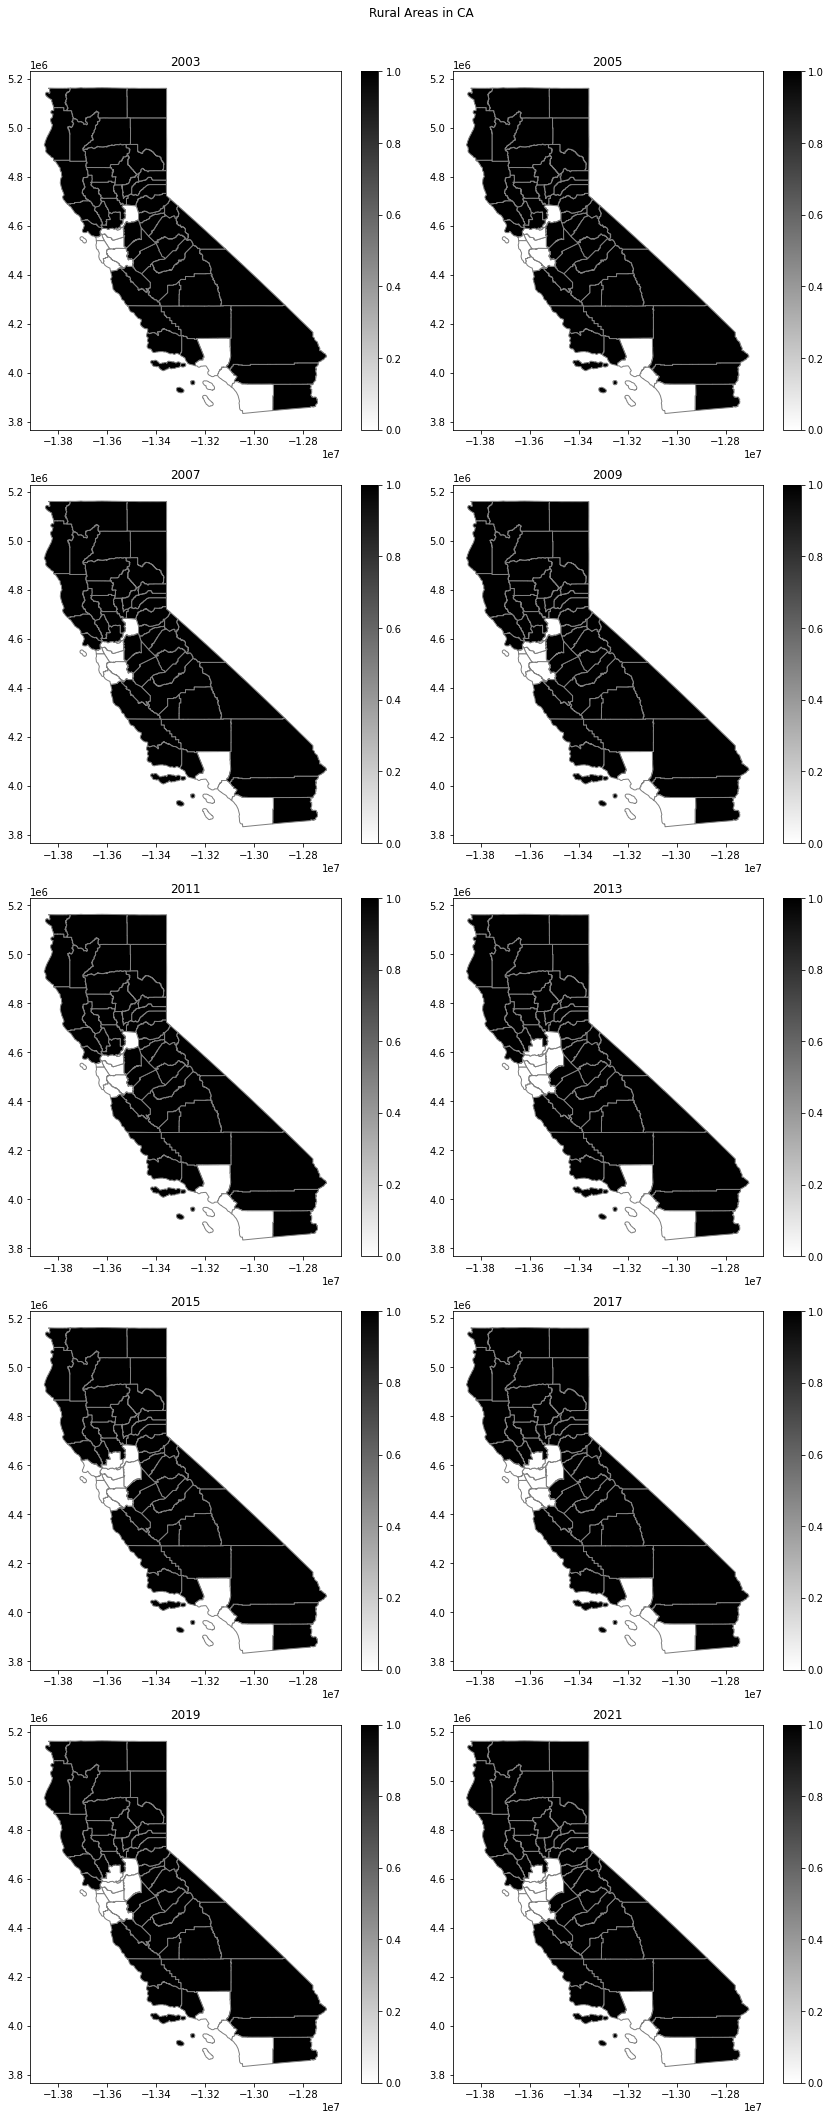

In [170]:
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(12)

i = 0
j = 0
for year in range(2003, 2022, 2):
    geolist[geolist['year'] == year].plot(column='rural',  ax=axs[i][j], cmap='binary', edgecolor='grey', legend=True).set_title(str(year));
    j = j + 1
    i = i + j // 2
    j = j % 2
    
fig.suptitle('Rural Areas in CA')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

## Choropleth for rep_ratio

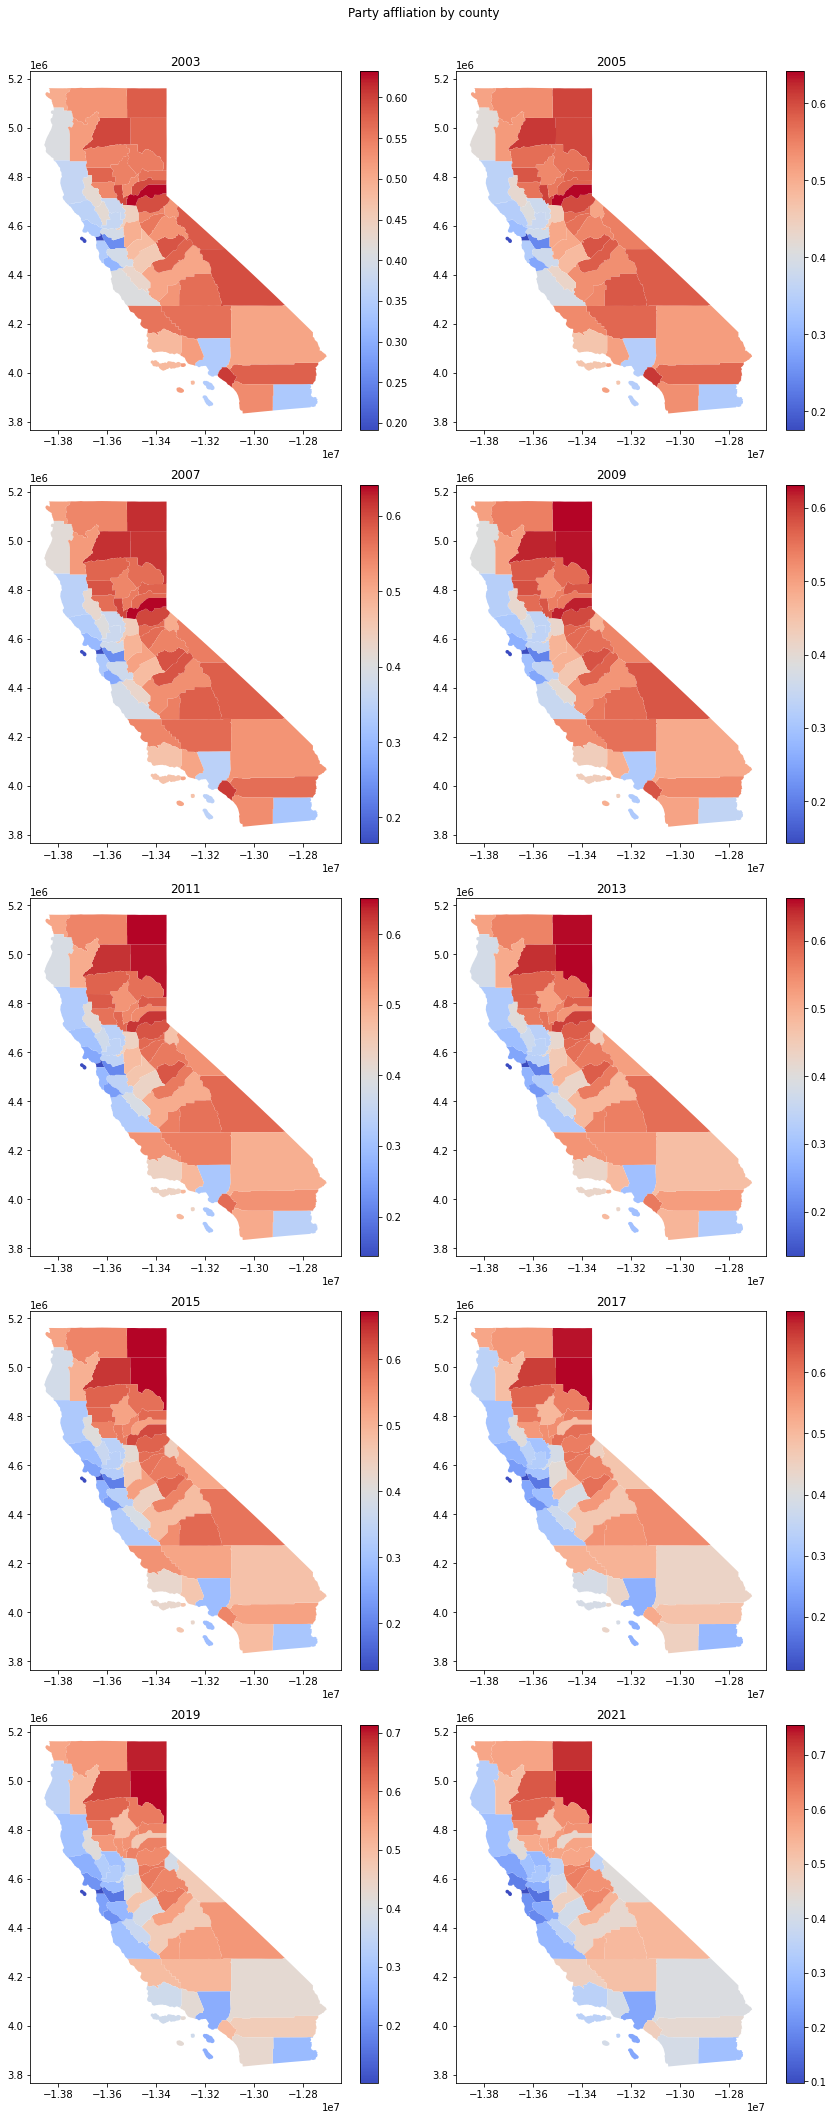

In [171]:
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(30)
fig.set_figwidth(12)
i = 0
j = 0
for year in range(2003, 2022, 2):
    geolist[geolist['year'] == year].plot(column='rep_ratio', cmap='coolwarm', legend=True, ax=axs[i][j]).set_title(str(year));
    j = j + 1
    i = i + j // 2
    j = j % 2
    
    
fig.suptitle('Party affliation by county')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

From the three graphs above, we see that the variables we are interested in exhibit some spatial autocorrelation as areas with similar values for the variables are grouped spatially. We noticed that this violates an assumption of linear regression. However, we weren't able to find a suitable statistical test for our research question. And our results are based on previously seen linear regressions.

# Ethics & Privacy

No personally identifying information, such as race, age, or gender, will be contained within our data as there is no record of who a UFO report sighting was made by. Additionally, there is no way of knowing who these Democratic or Republican individuals are, only the individual's political affiliation and geographic region. Our data is collected from publicly available official organisation reportings as well as datasets from local and state government documentation. Because of this, there should be no potential biases in terms of excluding any populations. Since these are objectively and impartially collected, they should not reflect any human biases. California is historically a blue state, with more Democratic constituents than Republican which would ultimately affect our data as the whole population is not a 50/50 Democratic-Republican split. Because of this, we hope to account for this ratio in our analysis of the data and not assume the de facto split. Potential biases lay in our hypothesis as we are working off of perception and assumptions of the ideologies of people in certain political parties, however this should not affect how we analyze or draw conclusions from our data. We have pre-emptively identified any more possible biases after greater research into our topic and the practices of the respective industries. Any perceived biases, confounds, and/or anomalies will be sufficiently addressed in our final report.

# Conclusion & Discussion

We sought to comprehensively analyze and explore the possible relationship between political party affiliation and UFO reporting behavior. Our findings support the conclusion that there is a slight linear correlation between the aggregate political leaning of California counties and the relative number of county-level UFO sightings reported to the UFORC database. 

We initially were interested in the demographic political leanings of sighting reporters, to see if there could be any significant difference in who is reporting sightings. Our tests suggested a positive linear relationship between Republican Party leaning and the number of reported sightings. Though we’ve also considered additional (and possibly confounding) party discrepancies, most notably the difference between urban and rural party populations. Contrary to our prediction, we found that rural areas were more likely to have zero reports than urban areas. Our collinearity test of rurality and Republicanism was also inconsistent year-to-year. Ultimately, we believe this is a possible confound worth further exploration. Our project was not designed to analyze this specific relationship, and therefore cannot conclusively rule on the subject.

Other limitations to our analysis included: 
 - Inability to account for spatial autocorrelation
 - No conclusion on the causation effect of one variable on the other
 - Variability in test results + strength of relationship from year-to-year

# Final Video Link

https://youtu.be/ym_GFKtKXCg

# Team Contributions

- Crystal Song: Overview, Data Cleaning, Conclusion & Discussion, Quality Assurance
- Fiona Feng: Background, Ethics and Privacy, EDA Descriptions, Video Production, Quality Assurance
- Hyejeong Yun: Minor Data Cleaning, EDA, Quality Assurance
- Katie Lin: Minor Data Cleaning, EDA, Quality Assurance
- Zhiqiang Pi: Web Scraping, Data Cleaning, EDA, Quality Assurance